# Análise Comparativa de Filtros Analógicos de 2ª Ordem

**Objetivo:** Este notebook implementa, simula e compara o desempenho de cinco topologias clássicas de filtros passa-baixa de 2ª ordem:

1.  **RC-RC Passivo (Polos Reais)**
2.  **Butterworth** (Maximamente Plano)
3.  **Chebyshev** (Ondulação na Passagem)
4.  **Cauer / Elíptico** (Ondulação em Ambas as Bandas)
5.  **Bessel** (Fase Linear / Atraso de Grupo Plano)

**Bancada de Testes:**
Para todos os filtros, usaremos uma frequência de corte alvo de $\omega_c = 2000 \text{ rad/s}$ ($f_c \approx 318 \text{ Hz}$).
O sinal de entrada será uma senoide de 60Hz contaminada por um ruído branco.

In [26]:


# Clonar repositório com os códigos
!git clone https://github.com/rnunesufc/Filtros_TIP8544.git

# Entrar na pasta
%cd Filtros_TIP8544



!pip install numpy matplotlib scipy control

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import control as ct

# Configurações globais para os gráficos
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Bibliotecas importadas e configuração de gráficos concluída.")
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import control as ct

# Configurações globais para os gráficos
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Bibliotecas importadas e configuração de gráficos concluída.")

Bibliotecas importadas e configuração de gráficos concluída.


In [27]:
def get_amplitude_spectrum(signal, N, mask):
    """
    Calcula e normaliza a FFT de um sinal.
    Retorna apenas a metade positiva do espectro.
    """
    yf = np.fft.fft(signal) # Calcula a FFT
    yf_positive = yf[mask] # Pega só a metade positiva
    
    # Normalização:
    # 1. Divide pelo número de pontos N
    # 2. Multiplica por 2 (porque "jogamos fora" a metade negativa)
    yf_mag = np.abs(yf_positive) / N
    yf_mag[1:] = yf_mag[1:] * 2 # Multiplica tudo por 2, exceto o DC (índice 0)
    
    return yf_mag

print("Função get_amplitude_spectrum() definida.")

Função get_amplitude_spectrum() definida.


## Capítulo 1: Os Filtros Passivos RC (Polos Reais)

### 1.1 Filtro RC Passa-Baixa de 1ª Ordem

Este é o bloco de construção fundamental. Consiste em um único resistor e um único capacitor.

* **Função de Transferência:** $H(s) = \frac{\omega_c}{s + \omega_c}$
* **Frequência de Corte:** $\omega_c = 1 / (RC)$
* **Atenuação (Roll-off):** -20 dB/década.
* **Polos:** Possui um único polo real em $s = -\omega_c$.

--- Rodando filtro1aOrdem.py ---
--- Projeto do Filtro RC (1ª Ordem) ---
Resistor: 500.0 Ohms
Capacitor: 1e-06 Farads
Frequência de Corte (wc): 2000.00 rad/s
Frequência de Corte (fc): 318.31 Hz
Constante de Tempo (tau): 0.0005 s

Função de Transferência H(s):
<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    2000
  --------
  s + 2000


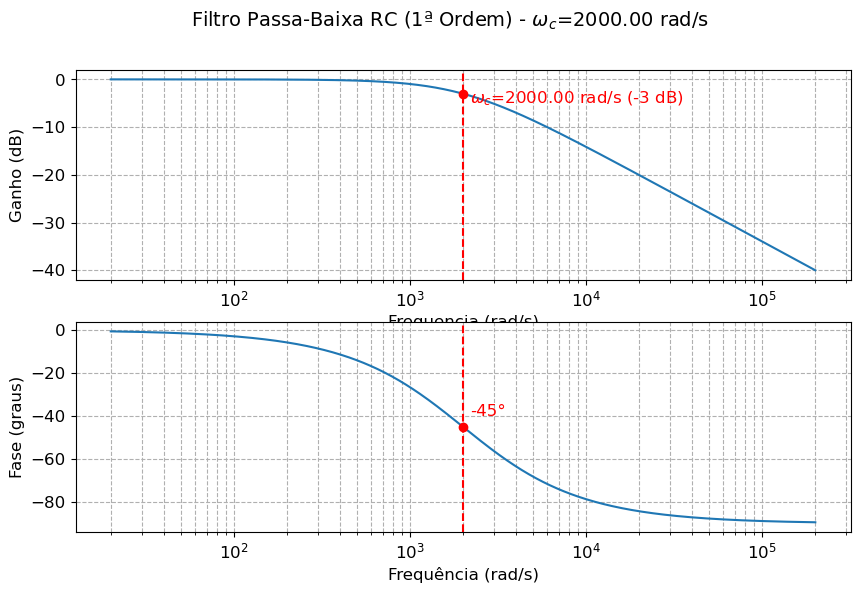

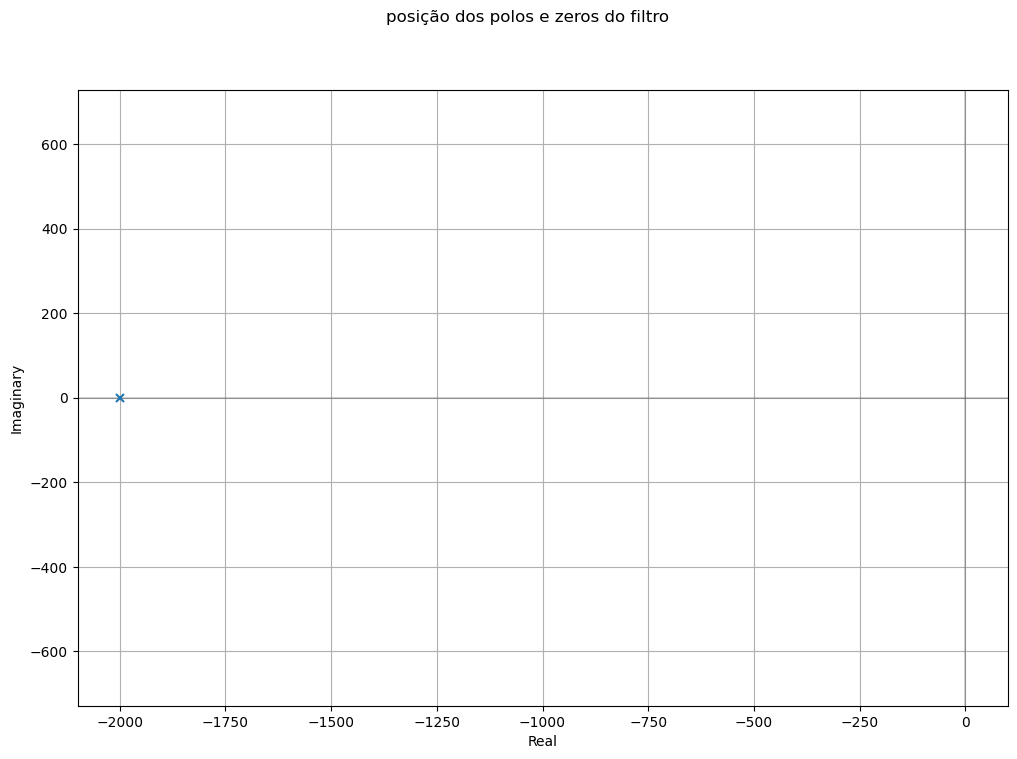

Sinal de 60Hz (Amp=2.5V) + Ruído (Pico max. aprox.=0.25V)


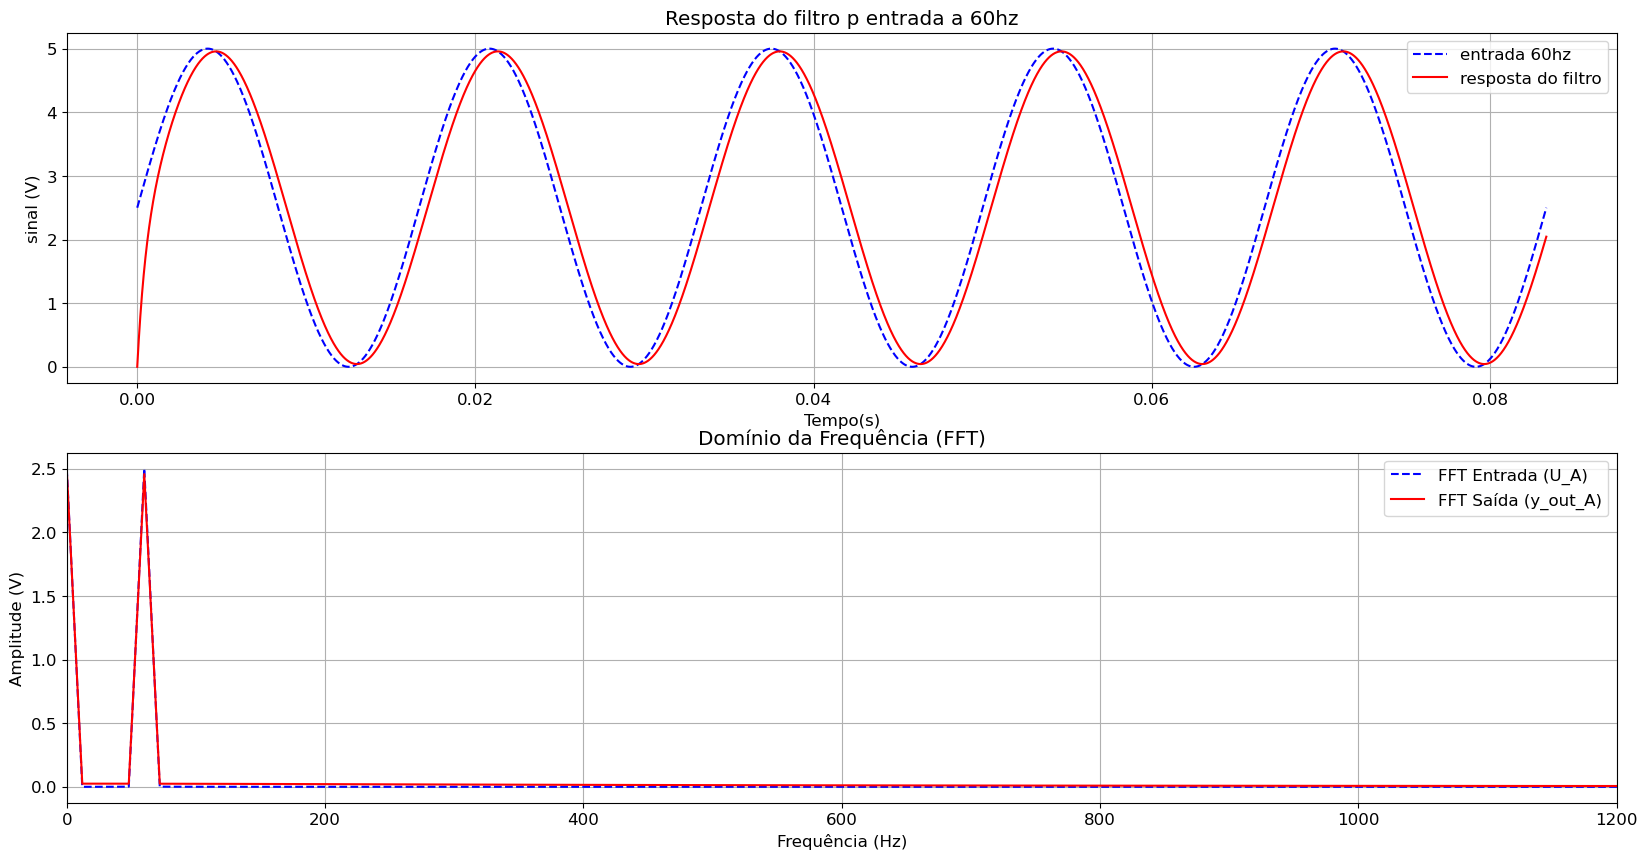

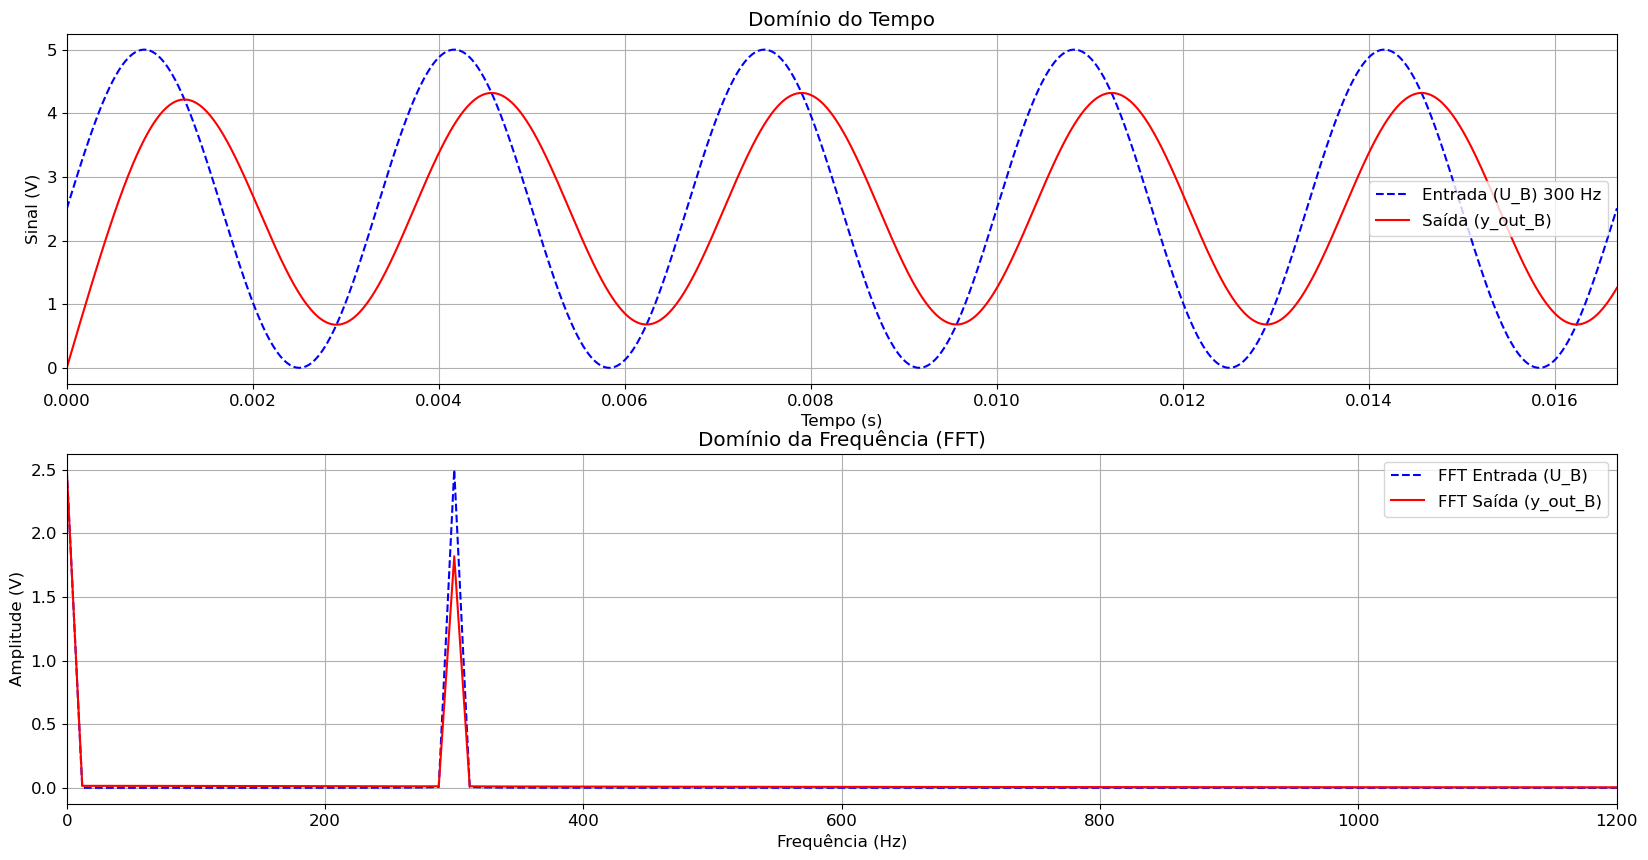

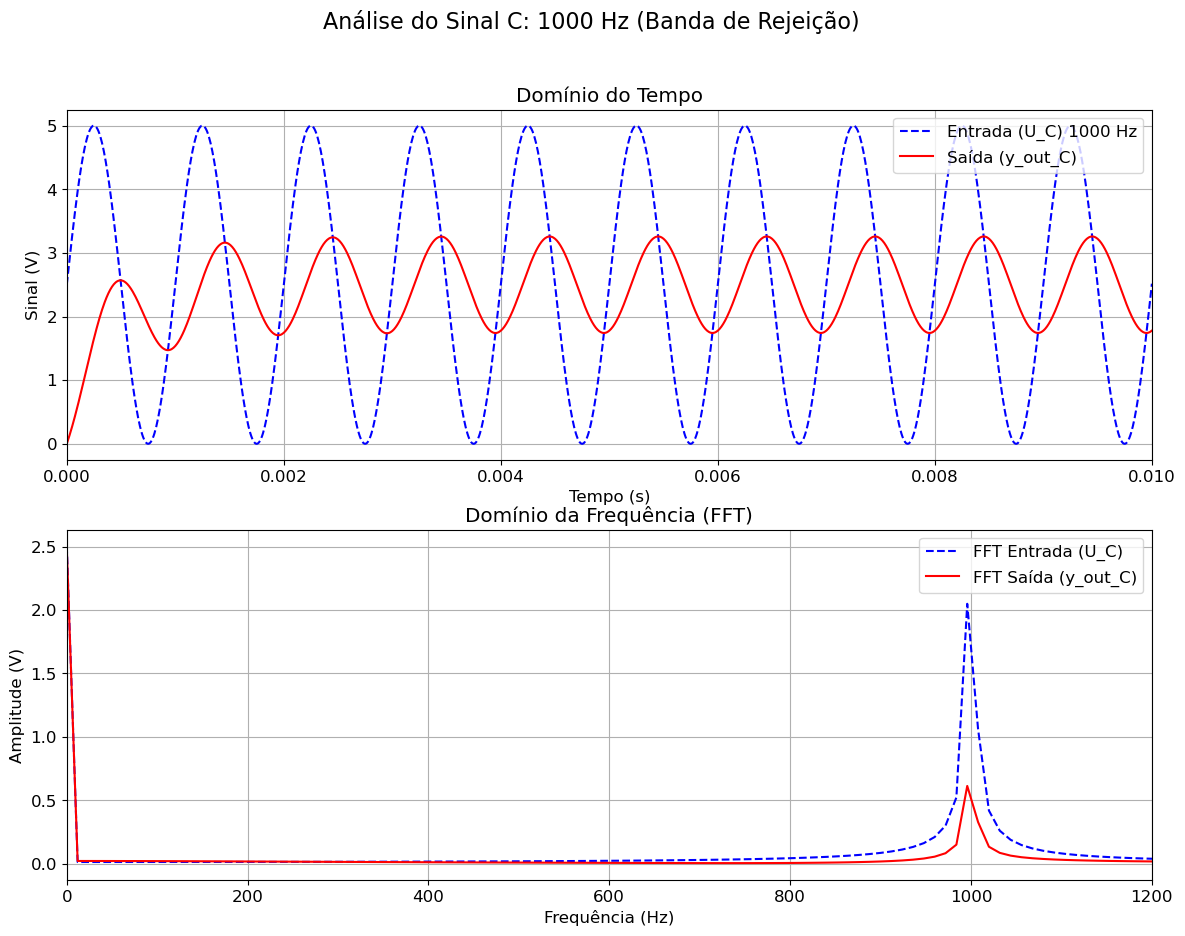

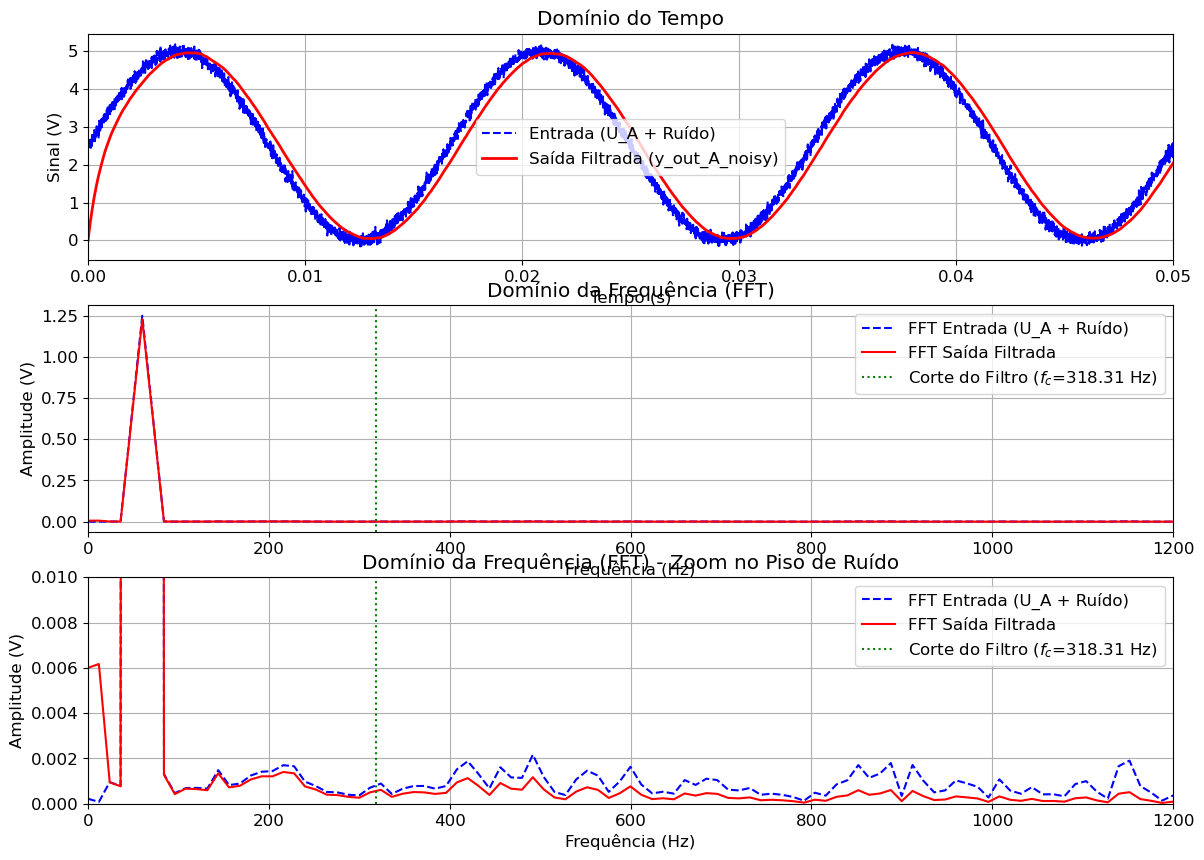


Variáveis do Filtro 1ª Ordem capturadas.


In [35]:
print("--- Rodando filtro1aOrdem.py ---")
# O comando %run executa o script. 
# Os gráficos do script aparecerão automaticamente aqui.
%run scripts/filtro1aOrdem.py

# --- Captura de Variáveis ---
# Imediatamente após rodar, capturamos as variáveis de resultado
# em nomes únicos antes que o próximo script as sobrescreva.

# (Assumindo que seus scripts definem estas variáveis)
w_1a = w
mag_1a = mod
fase_1a = fase
U_A_ruido_1a=U_A_ruido
y_out_A_ruido_1a=y_out_A_ruido
t_out_1a = t_out
fft_U_A_ruido_1a=fft_U_A_ruido
fft_y_A_ruido_1a=fft_y_A_ruido
wcF_1a = wcF
fc_hz_1a = fc_hz

print("\nVariáveis do Filtro 1ª Ordem capturadas.")

## Capítulo 2: Filtro RC de 2ª Ordem (Polos Reais)

A progressão natural do filtro de 1ª ordem é "empilhar" (colocar em cascata) dois filtros para obter um *roll-off* (atenuação) mais acentuado, de -40 dB/década.

O script `filtro2aOrdem.py` simula o comportamento de dois filtros RC ideais em cascata (assumindo um *buffer* entre eles, para que o segundo estágio não "carregue" o primeiro).

* **Função de Transferência:** $H(s) = \frac{\omega_{c1}}{s + \omega_{c1}} \cdot \frac{\omega_{c2}}{s + \omega_{c2}} = \frac{\omega_{c1}\omega_{c2}}{s^2 + (\omega_{c1}+\omega_{c2})s + \omega_{c1}\omega_{c2}}$
* **Polos:** Possui dois polos reais, em $s = -\omega_{c1}$ e $s = -\omega_{c2}$.

**A Limitação Fundamental:**
Como os polos são reais, este filtro é **superamortecido** ($\zeta \ge 1$). Isso significa que ele não pode criar as curvas de resposta "agressivas" (com "joelho" pronunciado) que veremos no Butterworth e no Chebyshev, que exigem **polos complexos**.

Executando o script `filtro2aOrdem.py` e capturando os resultados:

--- Rodando filtro2aOrdem.py ---
--- Projeto do Filtro RC (2ª Ordem) ---
Resistor: 55000.0 Ohms
Capacitor: 9.1e-09 Farads
Frequência de Corte (wc1): 1998.00 rad/s
Frequência de Corte (fc1): 317.99 Hz
Constante de Tempo (tau1): 0.0005005000000000001 s
Resistor: 5000.0 Ohms
Capacitor: 1e-07 Farads
Frequência de Corte (wc2): 2000.00 rad/s
Frequência de Corte (fc2): 318.31 Hz
Constante de Tempo (tau2): 0.0005 s

Função de Transferência H(s):
<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         3.996e+06
  ------------------------
  s^2 + 3998 s + 3.996e+06


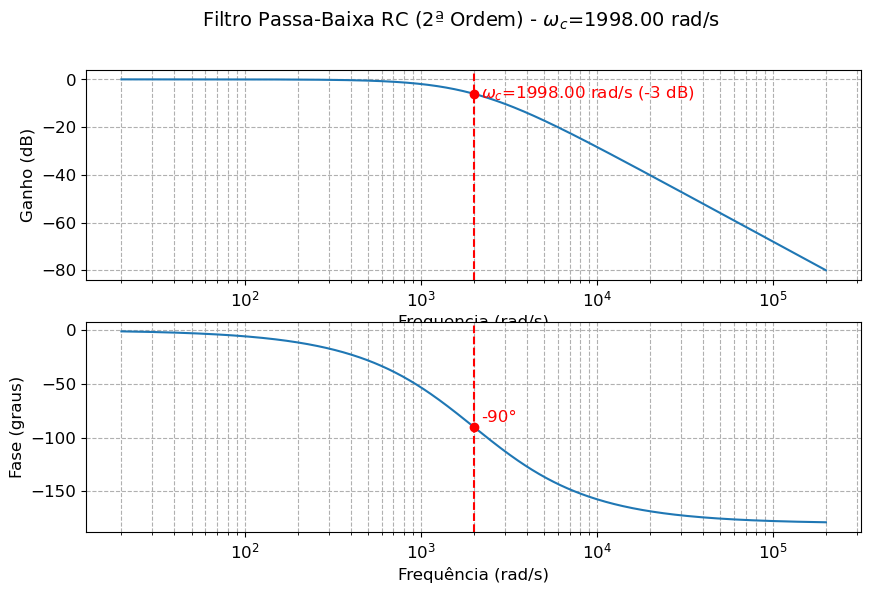

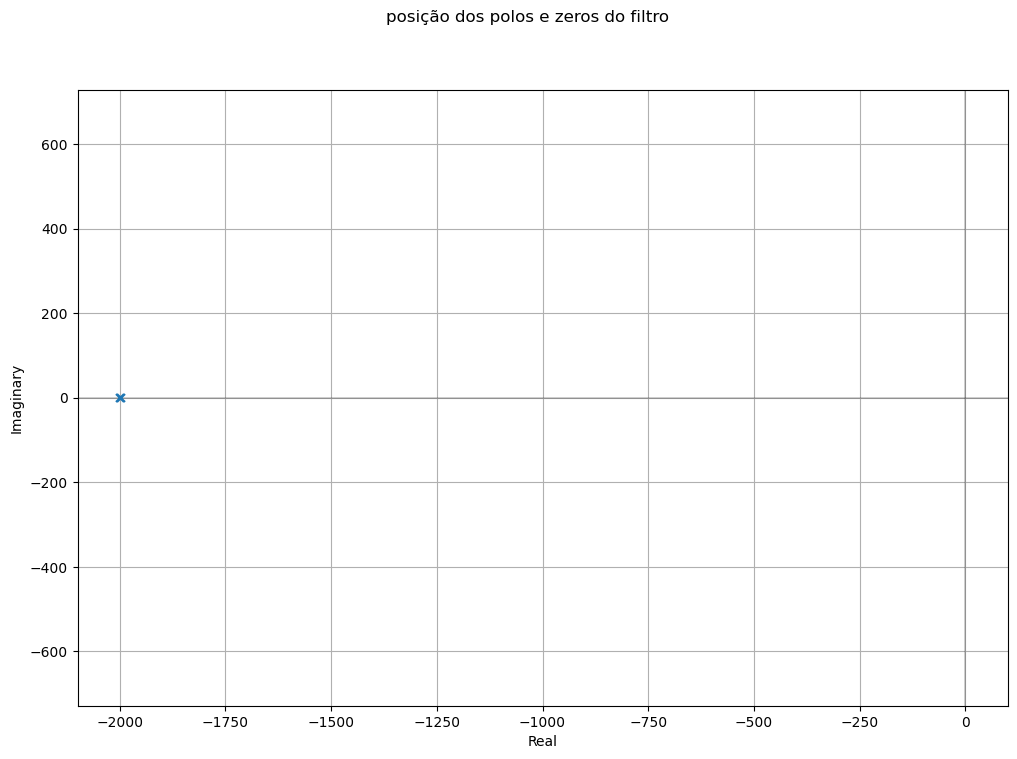

Sinal de 60Hz (Amp=2.5V) + Ruído (Pico max. aprox.=0.25V)


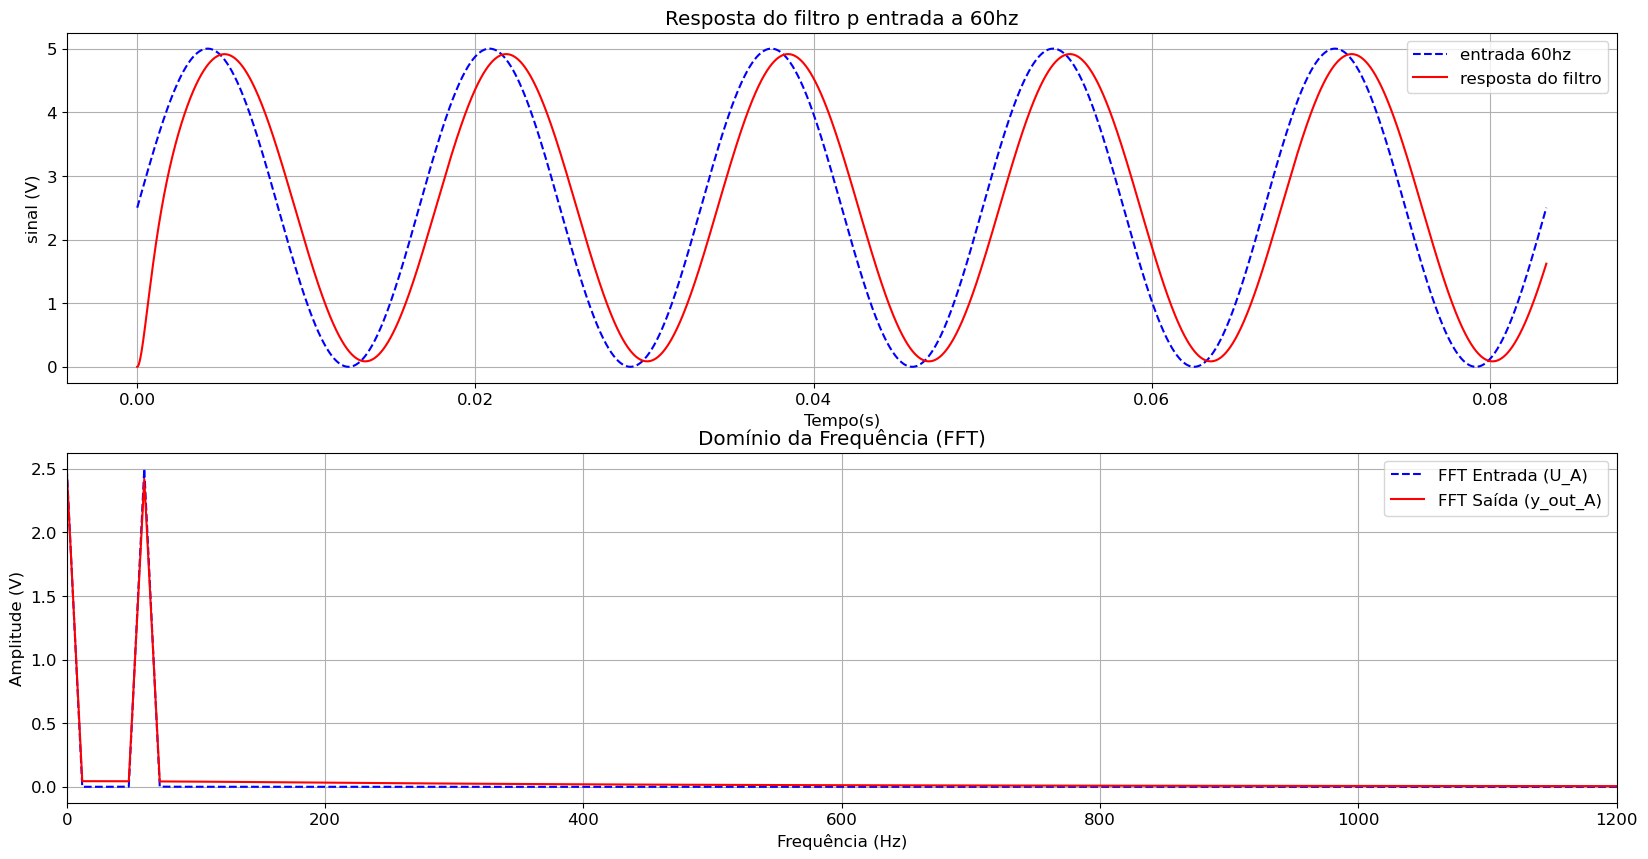

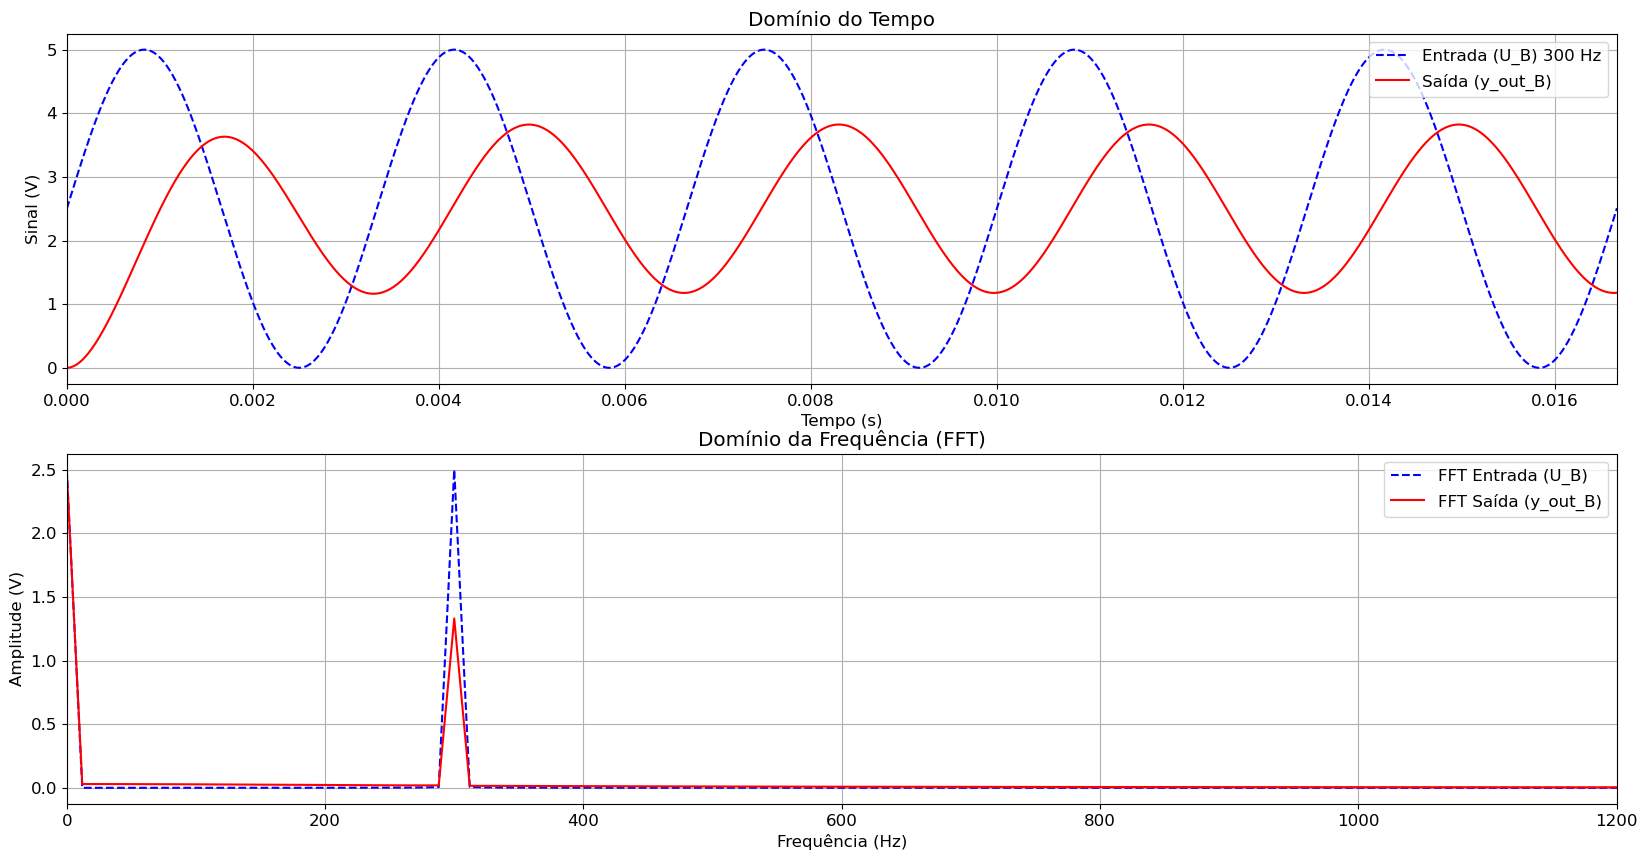

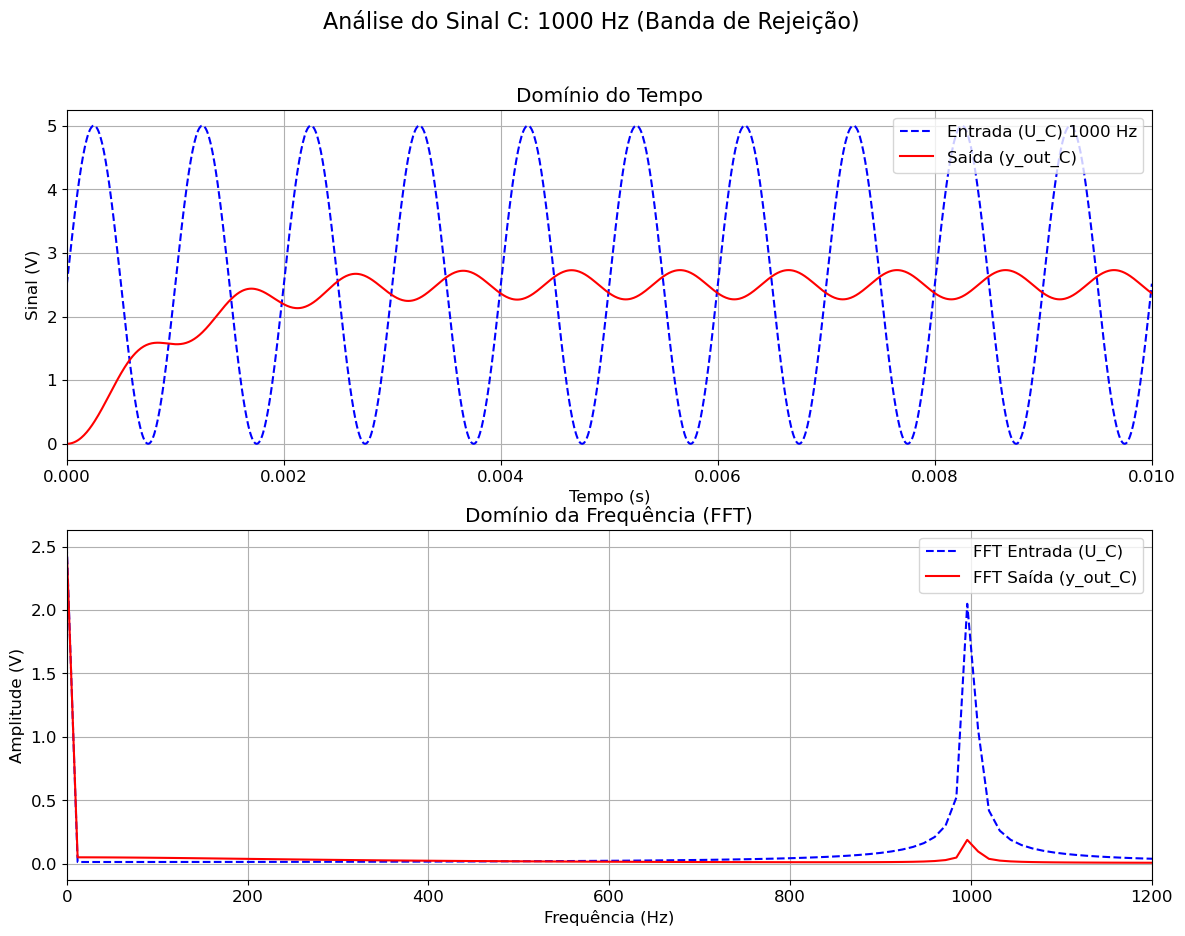

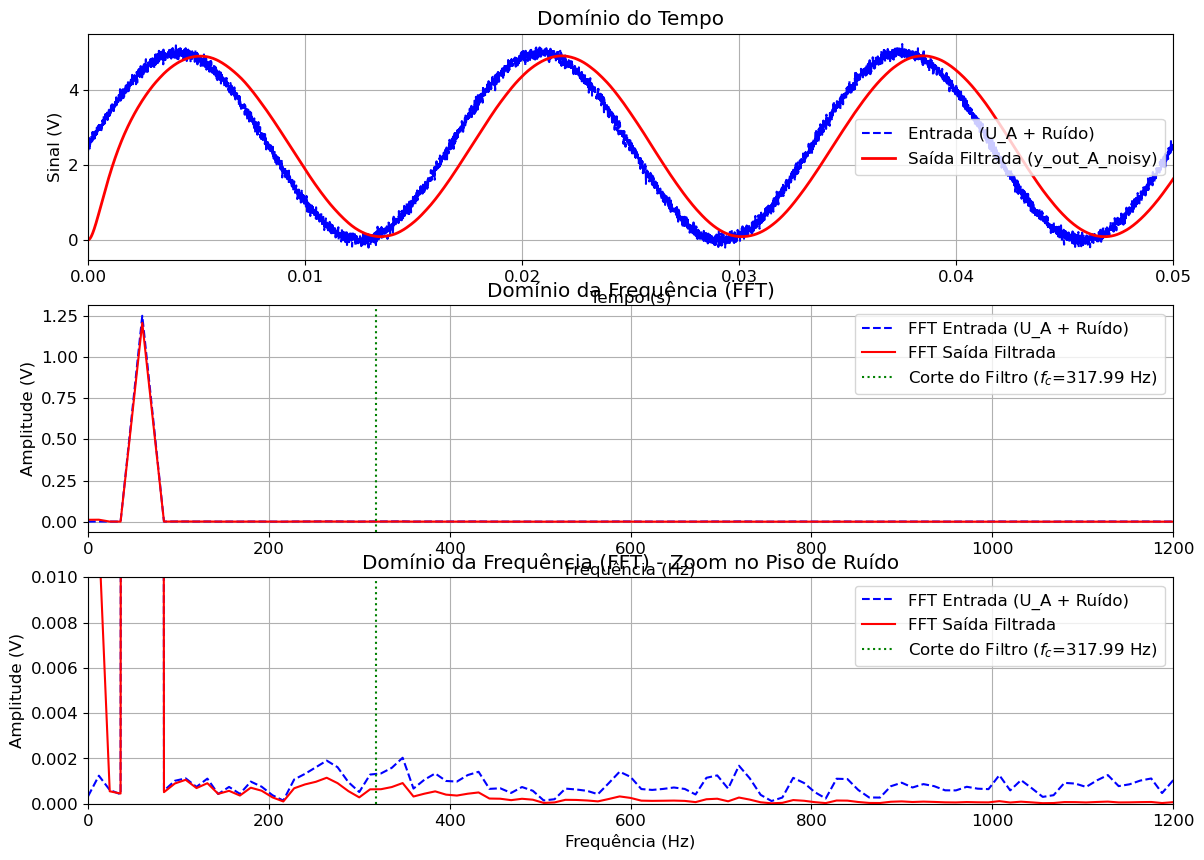


Variáveis do Filtro 2ª Ordem capturadas.


In [38]:
print("--- Rodando filtro2aOrdem.py ---")
# O comando %run executa o script. 
# Os gráficos do script aparecerão automaticamente aqui.
%run scripts/filtro2aOrdem.py

# --- Captura de Variáveis ---
# Capturamos as variáveis de resultado em nomes únicos
# antes que o próximo script as sobrescreva.

# (Assumindo que seu script 'filtro2aOrdem.py' define estas variáveis)
w_2a = w
mag_2a = mod
fase_2a = fase
U_A_ruido_2a = U_A_ruido
y_out_A_ruido_2a = y_out_A_ruido
t_out_2a = t_out
fft_U_A_ruido_2a = fft_U_A_ruido
fft_y_A_ruido_2a = fft_y_A_ruido
wcF1_2a = wcF1  # Polo 1
wcF2_2a = wcF2  # Polo 2
fc_hz_2a = fc_hz  # Frequência de corte (provavelmente baseada em wcF1 ou wcF2)

print("\nVariáveis do Filtro 2ª Ordem capturadas.")

## Capítulo 3: Filtro Butterworth N=2 (Sallen-Key)

Entramos agora nos filtros ativos de 2ª ordem. A limitação dos filtros RC-RC (Capítulo 2) era a incapacidade de criar **polos complexos conjugados**, que são essenciais para um *roll-off* acentuado e uma resposta em frequência "plana" (flat).

A topologia **Sallen-Key** (diagrama abaixo) usa um Amplificador Operacional (AmpOp) com realimentação positiva para "mover" os polos do eixo real para o plano complexo, permitindo-nos projetar filtros de alto desempenho.

![Diagrama Sallen-Key](Fig/sallen_key.png)

A Função de Transferência genérica (passa-baixa) que implementamos para o Sallen-Key é:
$$
G(s) = \frac{K \omega_0^2}{s^2 + (\omega_0/Q)s + \omega_0^2}
$$
(Onde $Q = 1/(2\zeta)$, $\omega_0 = 1/RC$ e $K = 1 + R_3/R_4$ para o nosso projeto com R,C iguais).

### O Filtro Butterworth (Maximamente Plano)

O Butterworth é o filtro "padrão de ouro" para aplicações de áudio e uso geral.
* **Vantagem:** Possui a resposta em frequência mais plana possível na banda de passagem. Não há *ripple* (ondulação).
* **Desvantagem:** Seu *roll-off* (atenuação) não é tão agressivo quanto o do Chebyshev ou Cauer.
* **Polos (N=2):** Para ser "maximamente plano", ele exige um fator de amortecimento $\zeta = 1/\sqrt{2} \approx 0.707$.

O script `Butterworth2aOrdem.py` implementa este filtro, definindo $\omega_0 = 2000 \text{ rad/s}$ e $\zeta=0.707$, o que nos leva a um ganho necessário de $K=1.586$.

Executando o script `Butterworth2aOrdem.py` e capturando os resultados:

--- Rodando Butterworth2aOrdem.py ---
--- Projeto do Filtro RC (2ª Ordem) ---
Resistor R1 e R2: 50000.0 Ohms
Capacitor C1 e C2: 1e-08 Farads
Frequência de Corte (wcF): 2000.00 rad/s
Frequência de Corte (fcF): 318.31 Hz

Função de Transferência H(s):
<TransferFunction>: sys[10]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       6.344e+06
  --------------------
  s^2 + 2828 s + 4e+06


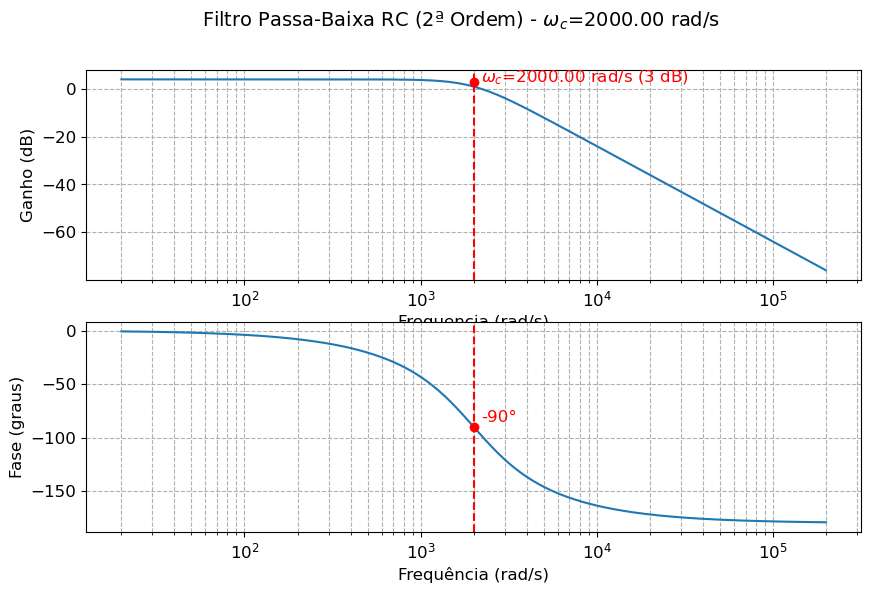

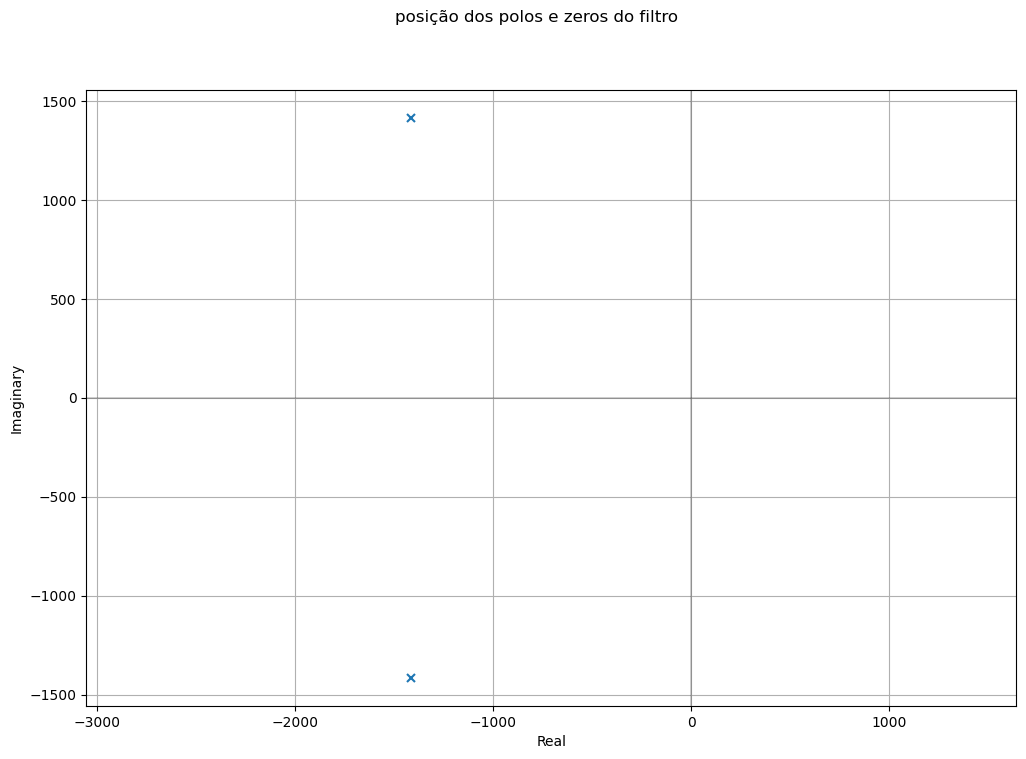

Sinal de 60Hz (Amp=2.5V) + Ruído (Pico max. aprox.=0.25V)


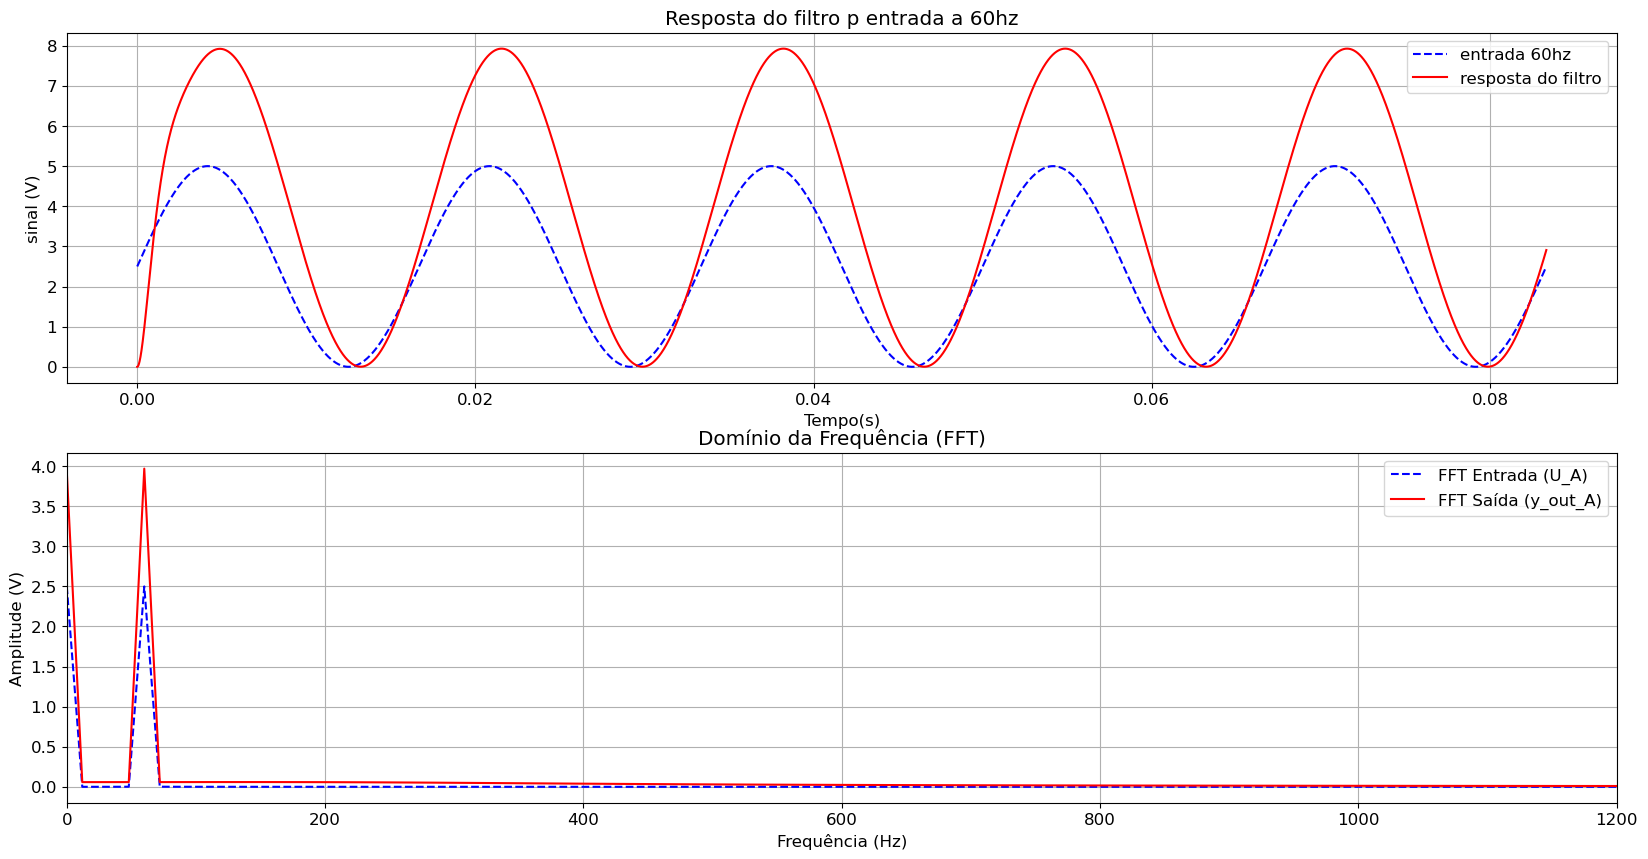

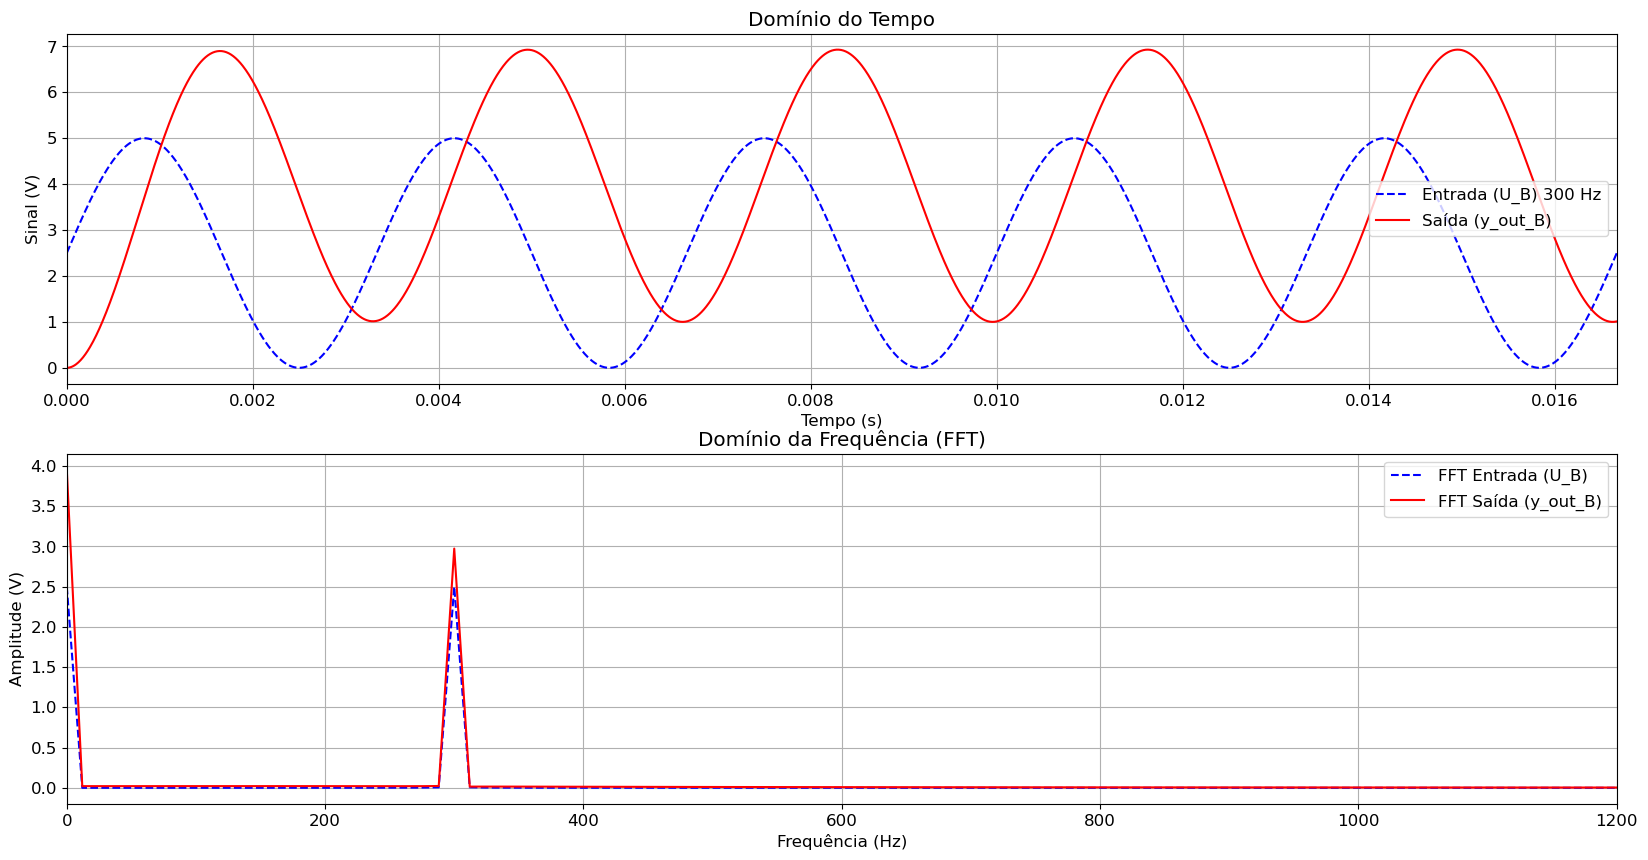

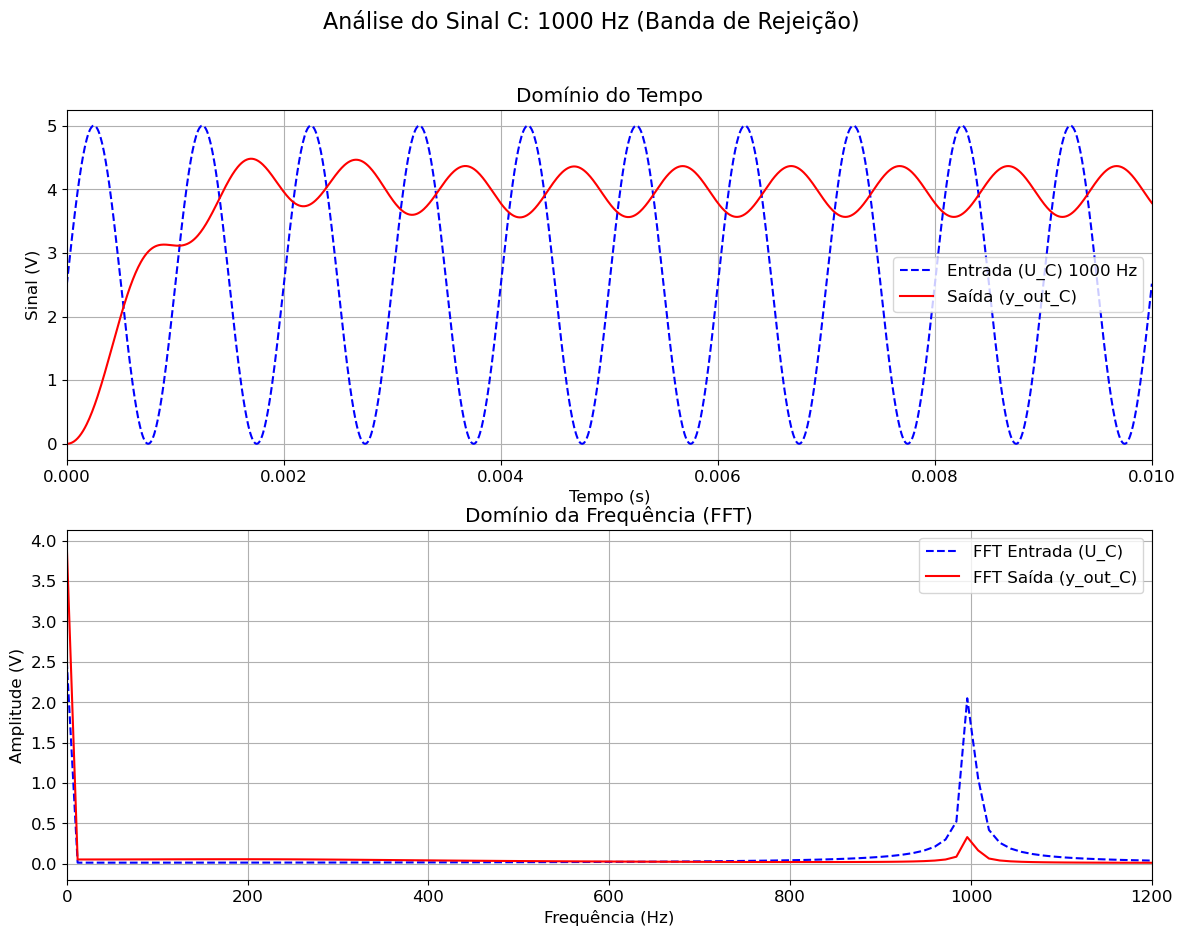

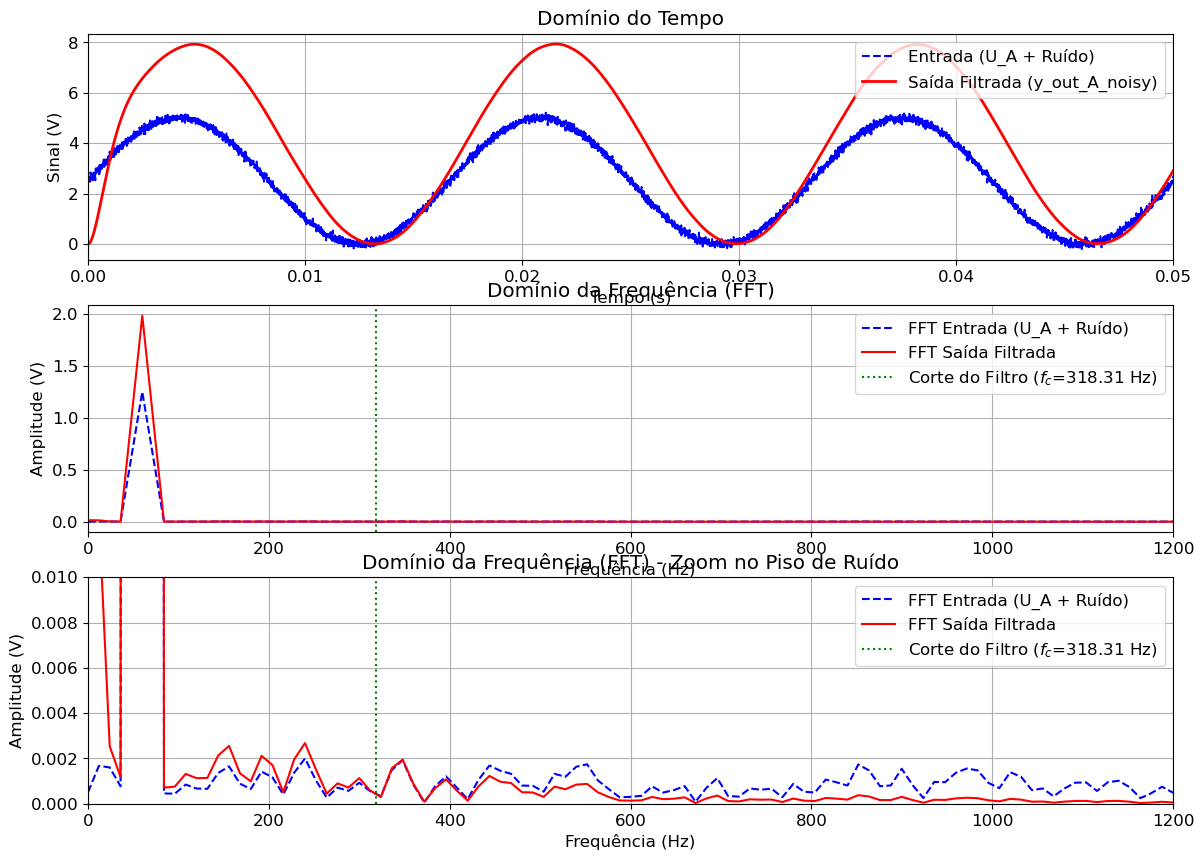


Variáveis do Filtro Butterworth capturadas.


In [45]:
print("--- Rodando Butterworth2aOrdem.py ---")
# O comando %run executa o script. 
# Os gráficos do script aparecerão automaticamente aqui.
%run scripts/Butterworth2aOrdem.py

# --- Captura de Variáveis ---
# Capturamos as variáveis de resultado em nomes únicos

# (Assumindo que seu script 'Butterworth2aOrdem.py' define estas variáveis)
w_butter = w
mag_butter = mod
fase_butter = fase
U_A_ruido_butter = U_A_ruido
y_out_A_ruido_butter = y_out_A_ruido
t_out_butter = t_out
fft_U_A_ruido_butter = fft_U_A_ruido
fft_y_A_ruido_butter = fft_y_A_ruido
wcF_butter = wcF
fc_hz_butter = fc_hz
KF_butter = KF       # Captura o Ganho K (deve ser 1.586)
zeta_butter = zeta   # Captura o Zeta (deve ser 0.707)

print("\nVariáveis do Filtro Butterworth capturadas.")

## Capítulo 4: Filtro Chebyshev N=2 (Sallen-Key)

O filtro Chebyshev (Tipo I) é o primeiro dos nossos filtros "agressivos". Ele faz uma troca (trade-off) consciente.

Para o nosso projeto, especificamos os seguintes parâmetros para a função `scipy.signal.cheby1`:
* **Ordem (N):** 2
* **Ripple (rp):** 2 dB (Isto define a oscilação permitida na banda passante)
* **Frequência de Corte (Wn):** 2000 rad/s (Para o Chebyshev, esta é a frequência onde o ganho *sai* da banda de ripple pela última vez)

A função de transferência genérica para um filtro de 2ª ordem (que implementamos com o Sallen-Key) é:
$$
H(s) = \frac{K \omega_c^2}{s^2 + 2\zeta \omega_c s + \omega_c^2}
$$
Onde:
* $\zeta$ (zeta) é o Fator de Amortecimento.
* $\omega_c$ (Wc) é a Frequência Natural dos polos, que, como você notou, **não é** a mesma que a frequência de corte de 2000 rad/s. Ela é calculada pelo Scipy para atender aos requisitos de *ripple*.

### O Trade-Off do Chebyshev

* **Vantagem:** Em troca da ondulação (*ripple*) de 2dB na banda de passagem, o Chebyshev oferece um *roll-off* (atenuação) **muito mais acentuado** do que o Butterworth.
* **Desvantagem (A Troca):**
    1.  Não é plano na banda de passagem.
    2.  O *Q-factor* mais alto (zeta baixo) necessário para criar o *ripple* causa uma **resposta transitória muito pior**, resultando em **overshoot** e **ringing** (oscilação) no domínio do tempo, como veremos.

O script `Chebt1.py` projeta este filtro e lida com o conflito de ganho (K) para a topologia Sallen-Key, resultando em uma FT final com K < 1.

Executando o script `Chebt1.py` e capturando os resultados:

--- Rodando Chebt1.py ---

Função de Transferência H(s):
<TransferFunction>: sys[11]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2.615e+06
  ------------------------
  s^2 + 1608 s + 3.292e+06
--- Projeto do Filtro RC (2ª Ordem) ---
Resistor R1 e R2: 24.41547437100941 Ohms
Capacitor C1 : 1e-05 Farads
Capacitor C2 : 5.095396147099873e-05 Farads
divisor de tensão:
Resistor R5: 2589.2541179416694 Ohms
Resistor R6: 10000.0 Ohms
Frequência de Corte (wcF): 2000.00 rad/s
Frequência de Corte (fcF): 318.31 Hz

Função de Transferência H(s):
<TransferFunction>: sys[12]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2.615e+06
  ------------------------
  s^2 + 1608 s + 3.292e+06


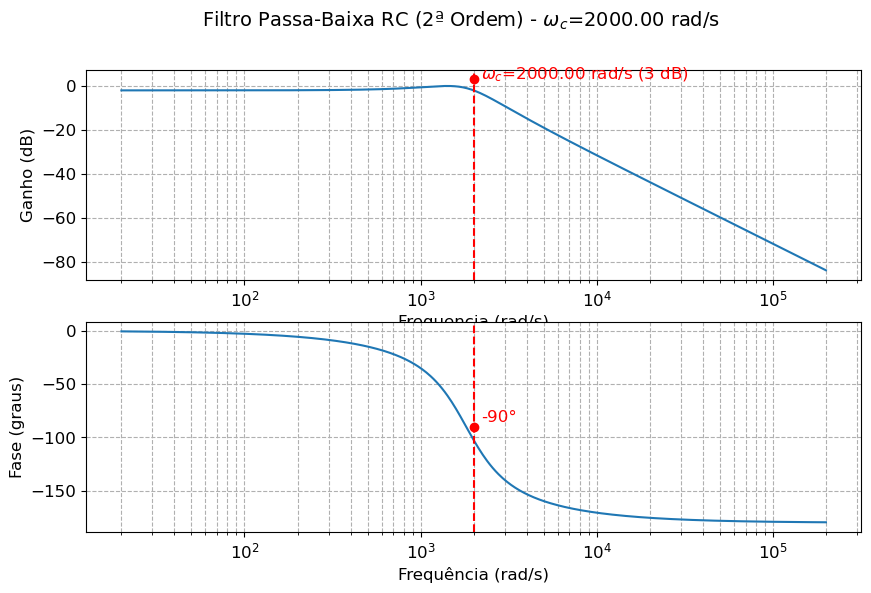

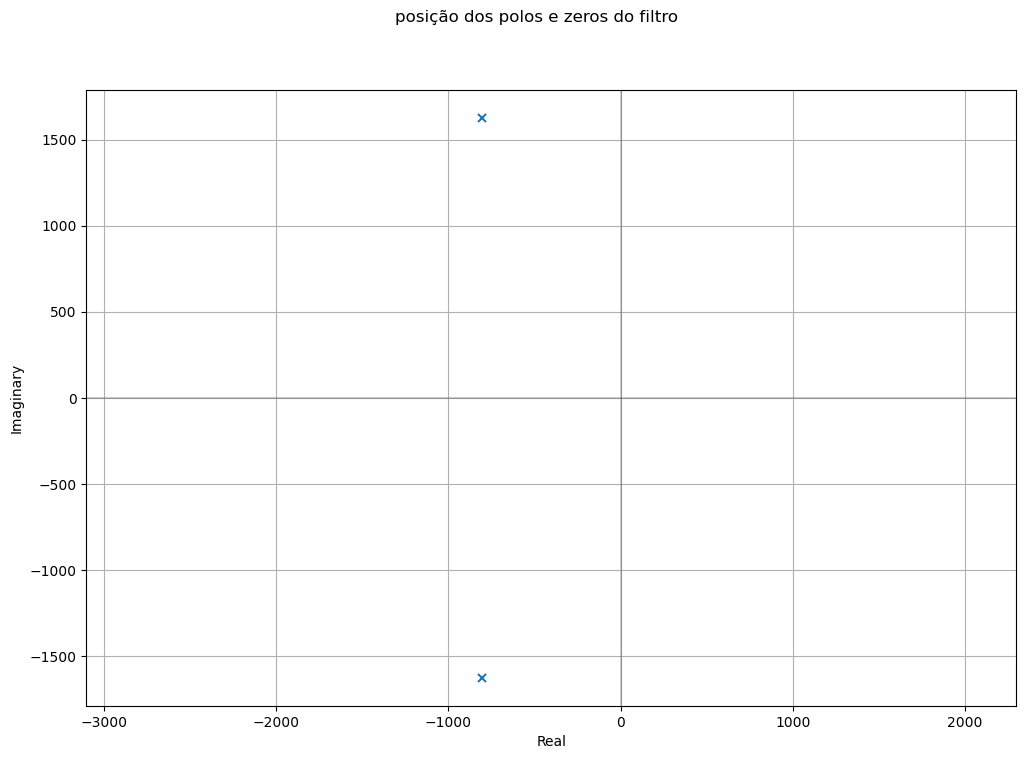

Sinal de 60Hz (Amp=2.5V) + Ruído (Pico max. aprox.=0.25V)


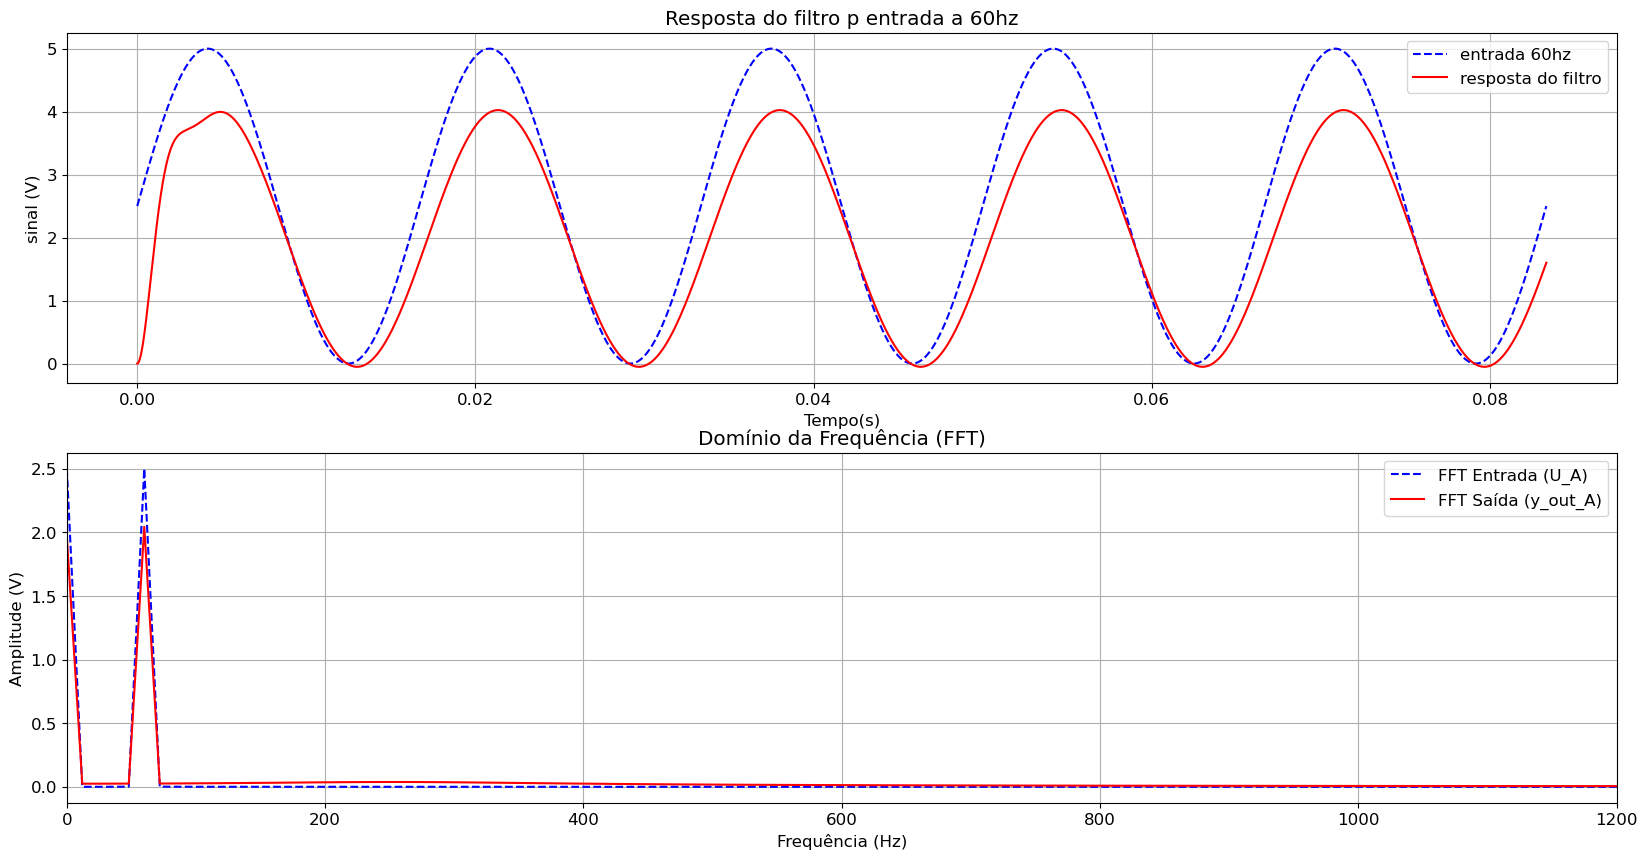

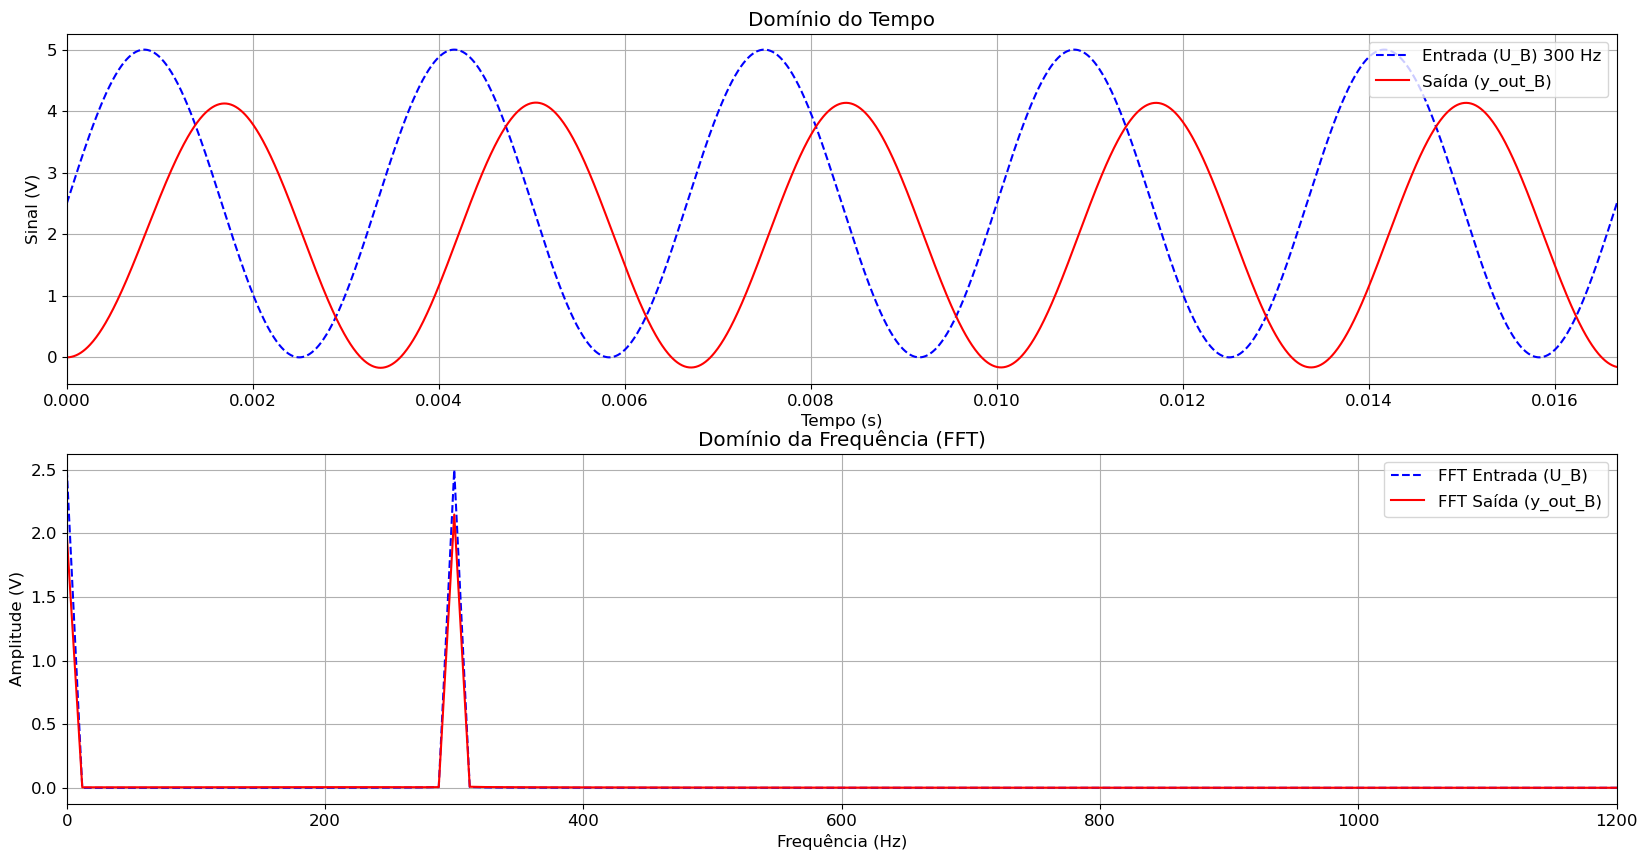

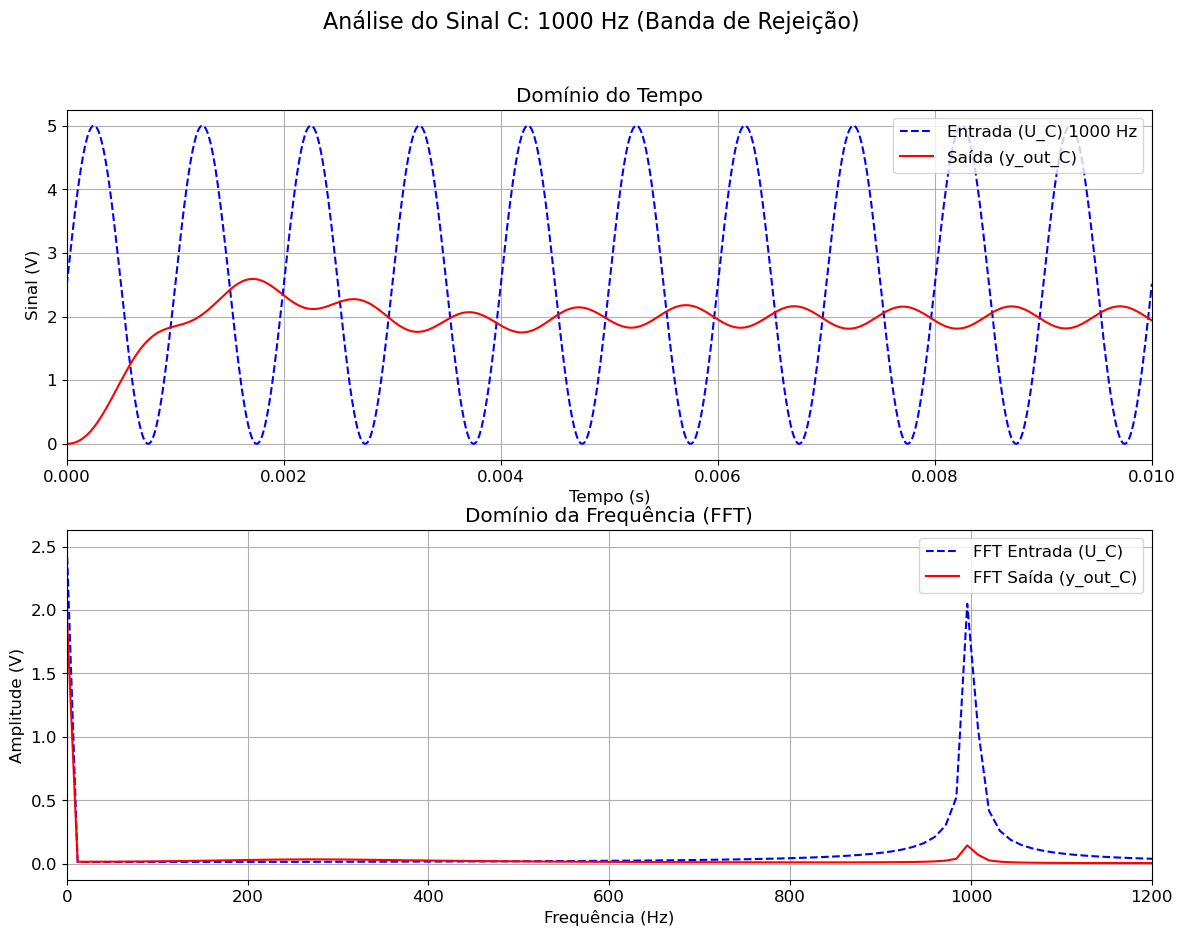

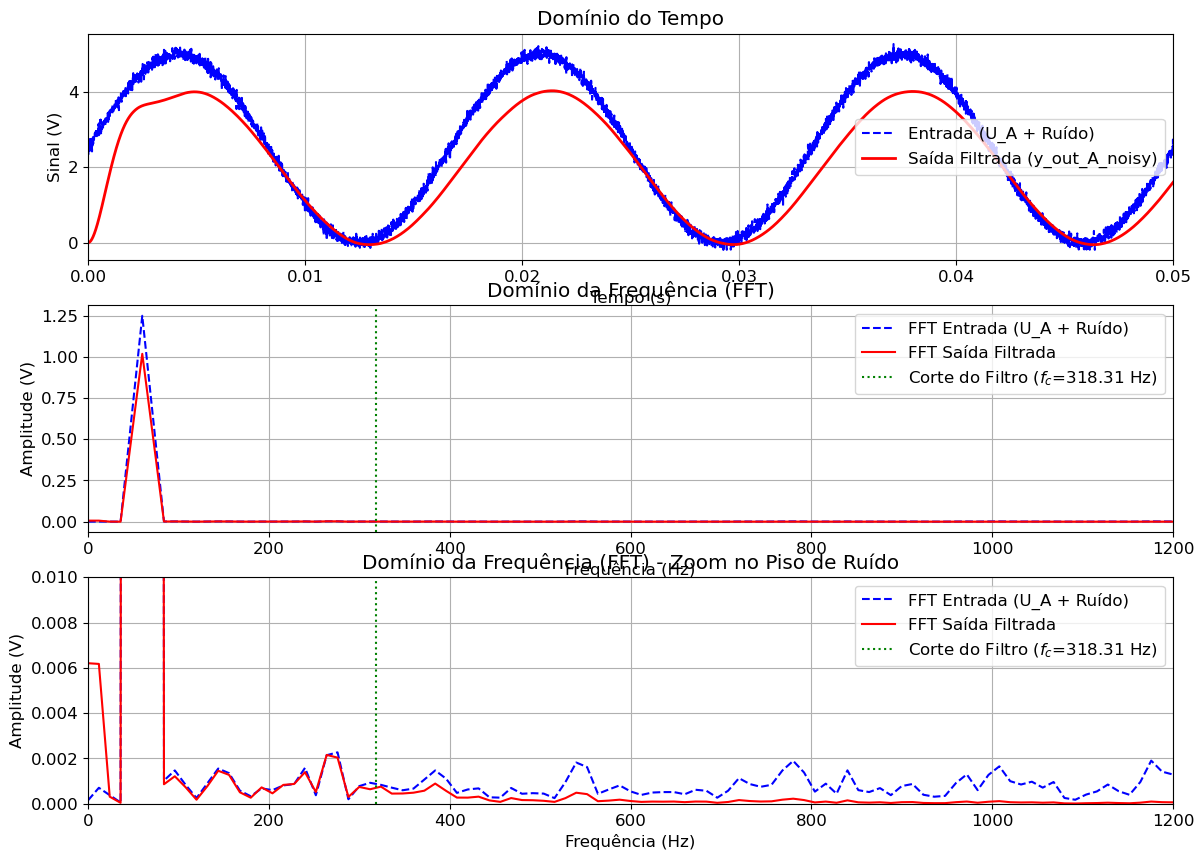


Variáveis do Filtro Chebyshev capturadas


In [56]:
print("--- Rodando Chebt1.py ---")
# O comando %run executa o script. 
# Os gráficos do script aparecerão automaticamente aqui.
%run scripts/Chebt1.py

# --- Captura de Variáveis ---
# Capturamos as variáveis de resultado em nomes únicos

# (Assumindo que seu script 'Chebt1.py' define estas variáveis)
w_cheby = w
mag_cheby = mod
fase_cheby = fase
U_A_ruido_cheby = U_A_ruido
y_out_A_ruido_cheby = y_out_A_ruido
t_out_cheby = t_out
fft_U_A_ruido_cheby = fft_U_A_ruido
fft_y_A_ruido_cheby = fft_y_A_ruido
wcF_cheby = wcF
fc_hz_cheby = fc_hz
KF_cheby = KF       # Captura o Ganho K (deve ser ~0.794)
#zeta_cheby = zeta   # Captura o Zeta
rp_cheby = rp       # Captura o parâmetro de ripple (ex: 2 dB)

print("\nVariáveis do Filtro Chebyshev capturadas")

## Capítulo 5: Filtro Cauer / Elíptico N=2 (Biquad)

Se o Chebyshev foi "agressivo", o Cauer (ou Elíptico) é o filtro "brutal". Ele é o resultado da pergunta: "Qual é o *roll-off* matematicamente mais íngreme que podemos obter?"

* **Vantagem:** O *roll-off* mais rápido de todos.
* **Como:** Ele faz o *trade-off* máximo. Ele permite *ripple* (ondulação) na banda de passagem (como o Chebyshev) e, em troca, introduz *ripple* (e *notches*, ou "zeros") na banda de rejeição.
* **Desvantagem:**
    1.  A resposta transitória (domínio do tempo) é a pior de todas, com *ringing* (oscilação) ainda mais pronunciado que o Chebyshev.
    2.  **Não pode ser implementado com o Sallen-Key.**

A FT de um filtro Cauer é "biquadrática" (tem $s^2$ no numerador e no denominador). Isso exige uma topologia de hardware "polo-zero" (pole-zero), como o **Biquad Tow-Thomas** (mostrado abaixo), que usa 3 AmpOps para "construir" a FT.

![Diagrama Biquad](Fig/biquad.png)

A Função de Transferência completa para esta topologia de Biquad (que usamos para calcular os componentes de hardware) é:

$$
H(s) = \frac{ \left(\frac{R_8}{R_6}\right) s^2 + \left[ \left(\frac{R_8}{R_6}\right) \left( \frac{1}{R_1 C_1} - \frac{R_6}{R_7 R_4 C_1} \right) \right] s + \left[ \left(\frac{R_8}{R_7}\right) \left(\frac{1}{R_3 R_5 C_1 C_2}\right) \right] }{ s^2 + \left(\frac{1}{R_1 C_1}\right)s + \left(\frac{R_8}{R_2 R_3 R_7 C_1 C_2}\right) }
$$

O script `Cauer_state_var.py` projeta o filtro Cauer e "casa" (match) os coeficientes da FT do Scipy com esta equação de hardware para encontrar os valores dos 8 resistores e 2 capacitores.

Executando o script `Cauer_state_var.py` e capturando os resultados:

--- Rodando Cauer_state_var.py ---
--- Filtro Cauer N=2, wc=2000.0, rp=2.0dB, rs=40.0dB ---
Coeficientes b (Numerador): [1.00000000e-02 0.00000000e+00 2.63498978e+06]
Coeficientes a (Denominador): [1.00000000e+00 1.59737961e+03 3.31725560e+06]

Função de Transferência H(s):
<TransferFunction>: sys[13]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    0.01 s^2 + 2.635e+06
  ------------------------
  s^2 + 1597 s + 3.317e+06

Função de Transferência H(s):
<TransferFunction>: sys[14]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    0.01 s^2 + 2.635e+06
  ------------------------
  s^2 + 1597 s + 3.317e+06


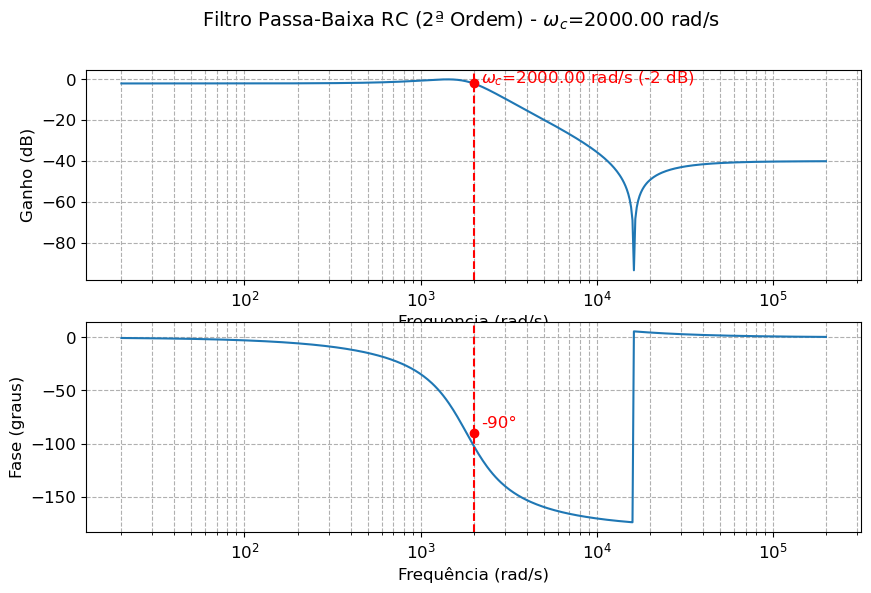

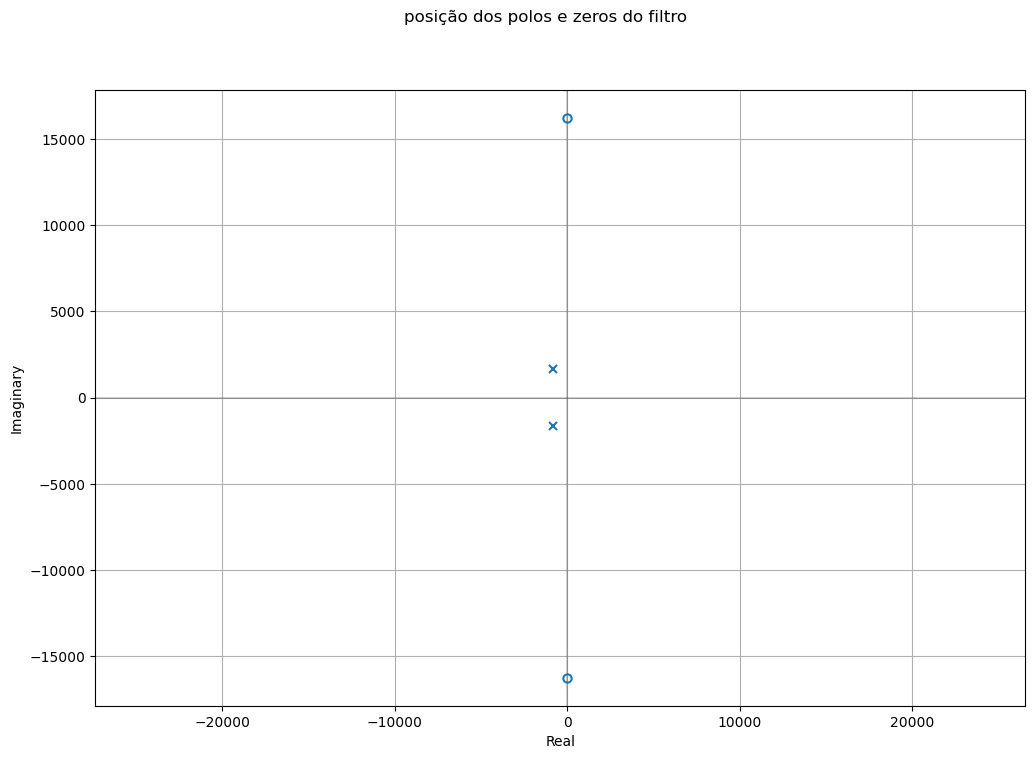

Sinal de 60Hz (Amp=2.5V) + Ruído (Pico max. aprox.=0.25V)


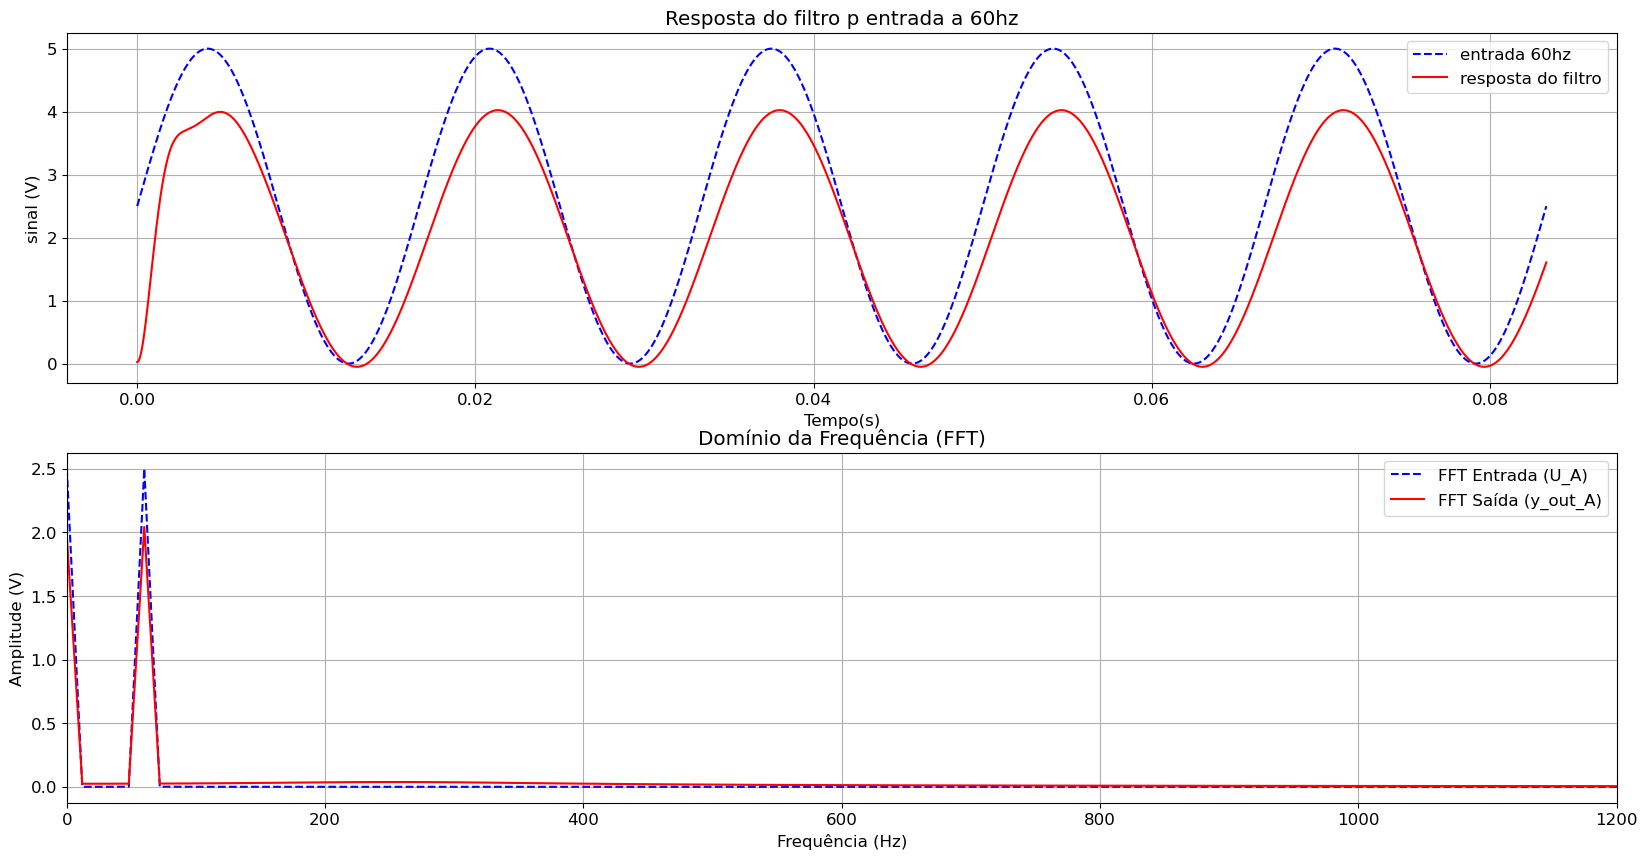

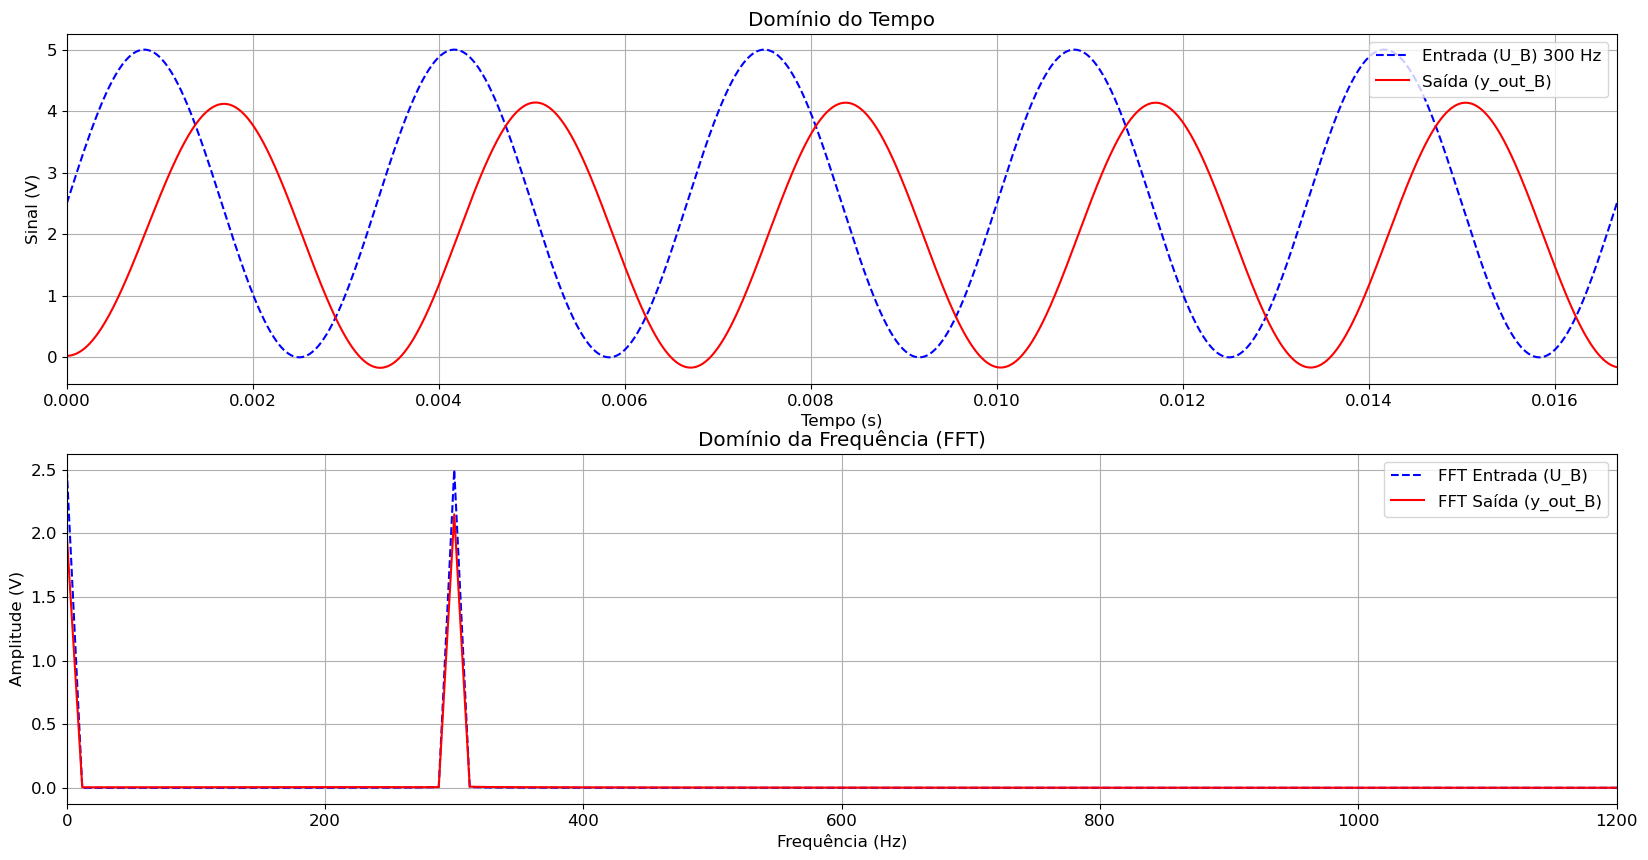

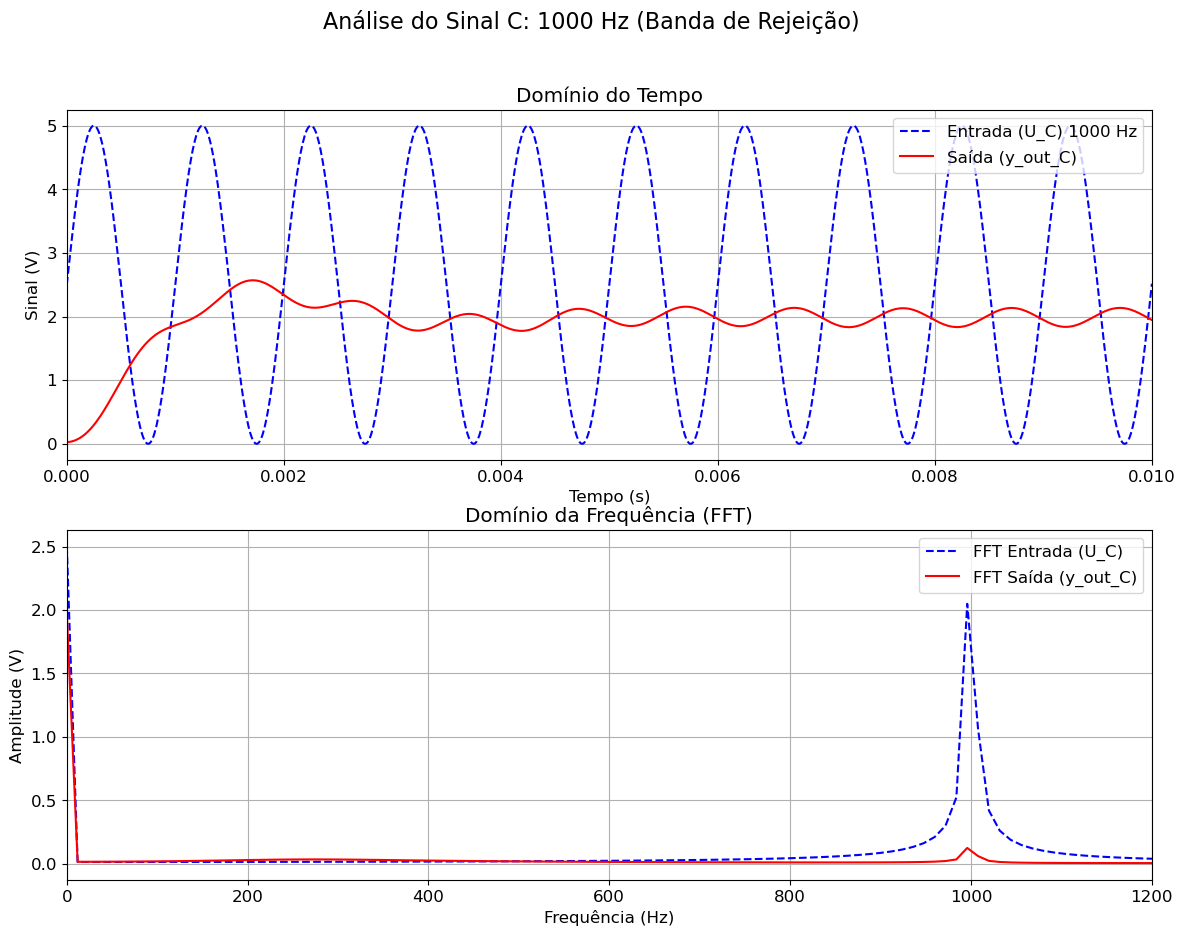

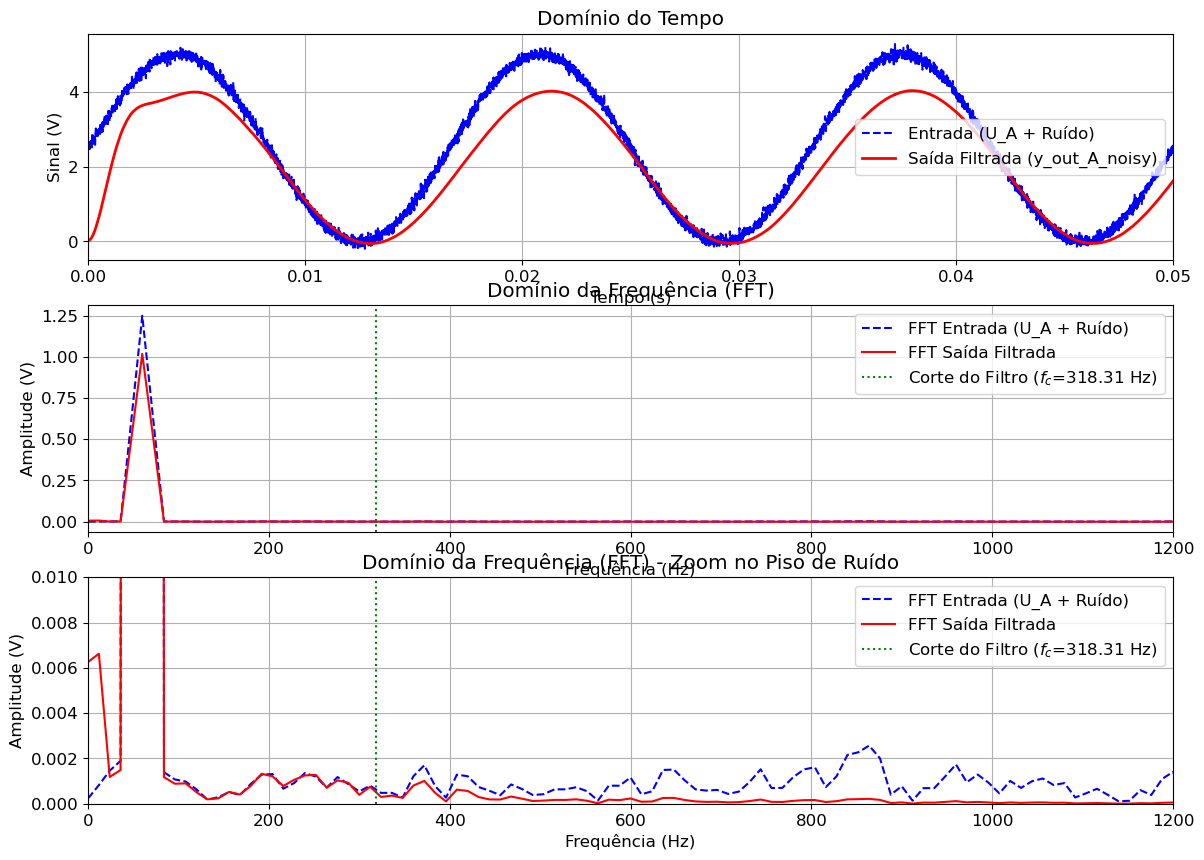


Variáveis do Filtro Cauer capturadas.


In [59]:
print("--- Rodando Cauer_state_var.py ---")
# O comando %run executa o script. 
# Os gráficos do script aparecerão automaticamente aqui.
%run scripts/Cauer_state_var.py

# --- Captura de Variáveis ---
# Capturamos as variáveis de resultado em nomes únicos

# (Assumindo que seu script 'Cauer_state_var.py' define estas variáveis)
w_cauer = w
mag_cauer = mod
fase_cauer = fase
U_A_ruido_cauer = U_A_ruido
y_out_A_ruido_cauer = y_out_A_ruido
t_out_cauer = t_out
fft_U_A_ruido_cauer = fft_U_A_ruido
fft_y_A_ruido_cauer = fft_y_A_ruido
wcF_cauer = wcF
fc_hz_cauer = fc_hz
rp_cauer = rp       # Captura o ripple de passagem (ex: 2 dB)
rs_cauer = rs       # Captura o ripple de rejeição (ex: 40 dB)

print("\nVariáveis do Filtro Cauer capturadas.")

## Capítulo 6: Filtro Bessel N=2 (Sallen-Key)

Chegamos ao filtro final da nossa análise, o **Filtro Bessel-Thomson**. Este filtro é otimizado para um objetivo completamente diferente dos anteriores: o **domínio do tempo**.

Enquanto Butterworth, Chebyshev e Cauer focam em "o que" (Magnitude) acontece no domínio da frequência, o Bessel foca em "quando" (Fase/Atraso).

* **Objetivo:** Atraso de Grupo Maximamente Plano (Maximally Flat Group Delay).
* **Vantagem:** O atraso de grupo plano significa que todas as frequências que passam pelo filtro são atrasadas *exatamente pela mesma quantidade de tempo*. Isso resulta em uma **preservação perfeita da forma do sinal**. É o único filtro que **não causa *overshoot* ou *ringing*** (oscilação) no domínio do tempo.
* **Desvantagem (A Troca):** Para alcançar essa perfeição no tempo, ele tem o **pior *roll-off* (atenuação) de todos**. Sua atenuação na banda de rejeição é significativamente mais lenta que a do Butterworth.
* **Implementação:** Assim como o Butterworth, é um filtro "all-pole" (só-polos) e pode ser implementado com a nossa topologia **Sallen-Key**.

O script `Bessel_2.py` projeta este filtro, definindo o `zeta` (amortecimento) "mágico" do Bessel N=2 ($\zeta \approx 0.866$) e calculando o ganho `K` necessário para a topologia Sallen-Key ($K \approx 1.268$).

Executando o script `Bessel_2.py` e capturando os resultados:

--- Rodando Bessel_2.py ---
--- Filtro Bessel N=2 (Sallen-Key R,C Iguais) ---
w0 (alvo) = 2000.00 rad/s
Zeta (alvo) = 0.8660
Ganho K (necessário) = 1.2679
Componentes Sallen-Key (R,C iguais):
R1=R2= 50000 Ohms
C1=C2= 1e-08 Farads
R4= 10000 Ohms
R3= 2679.49 Ohms (Usar valor comercial 2.7k)

Função de Transferência H(s) (Implementável):
<TransferFunction>: sys[15]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       5.072e+06
  --------------------
  s^2 + 3464 s + 4e+06


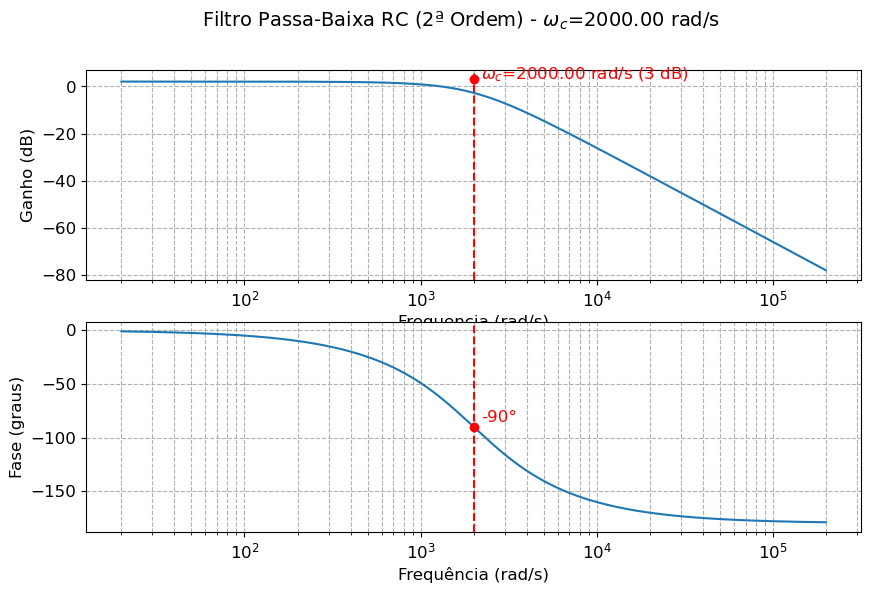

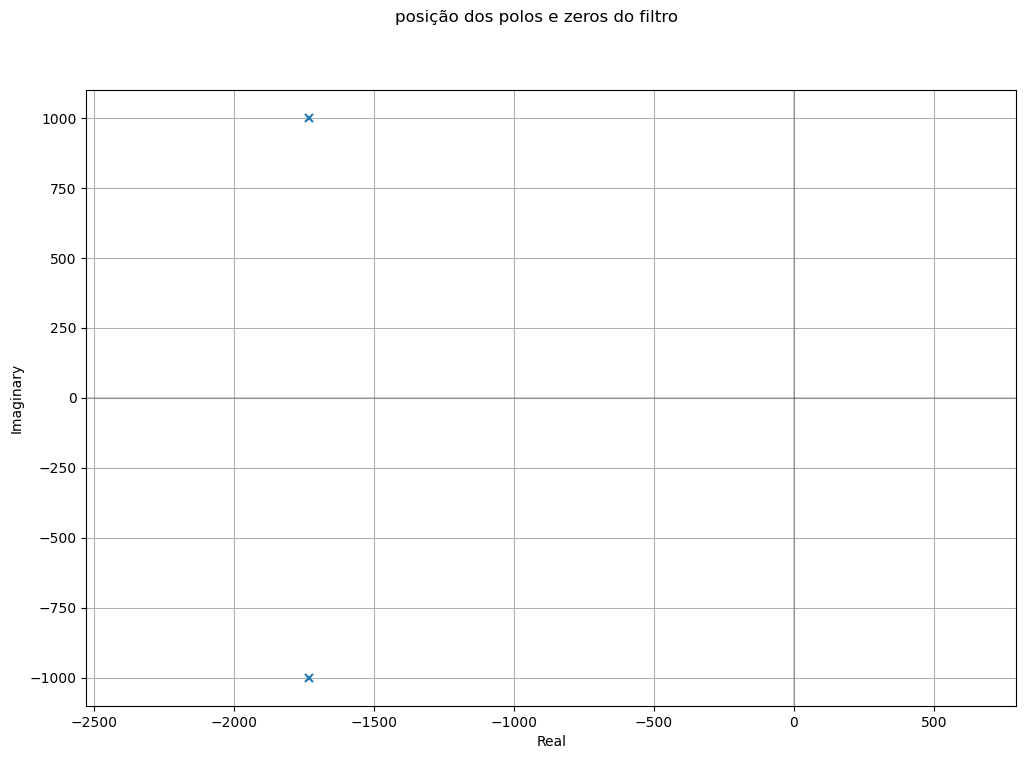

Sinal de 60Hz (Amp=2.5V) + Ruído (Pico max. aprox.=0.25V)


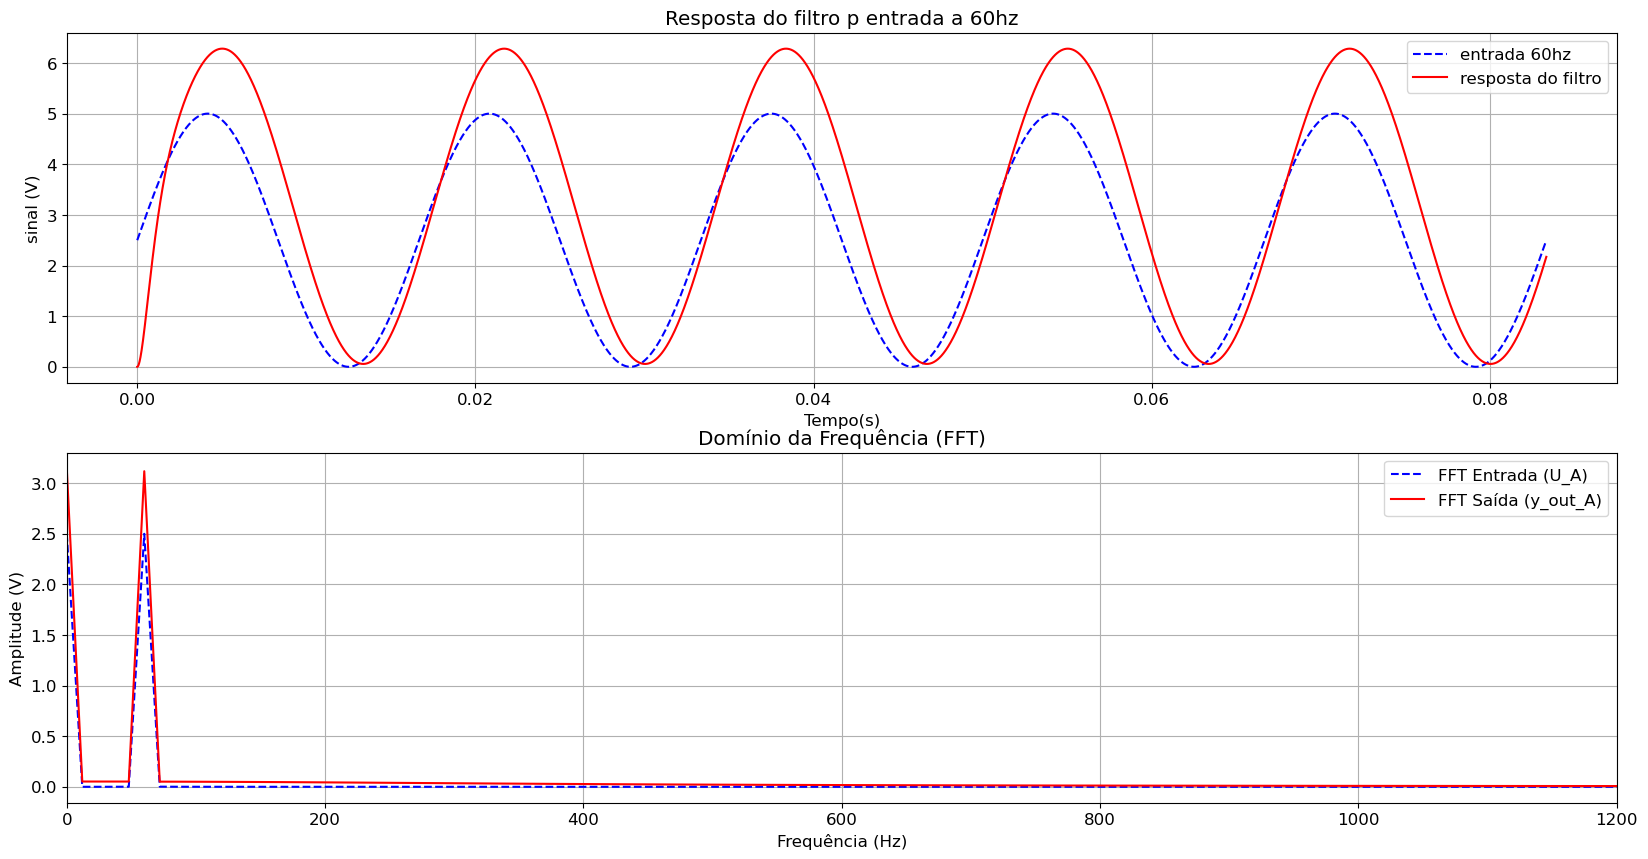

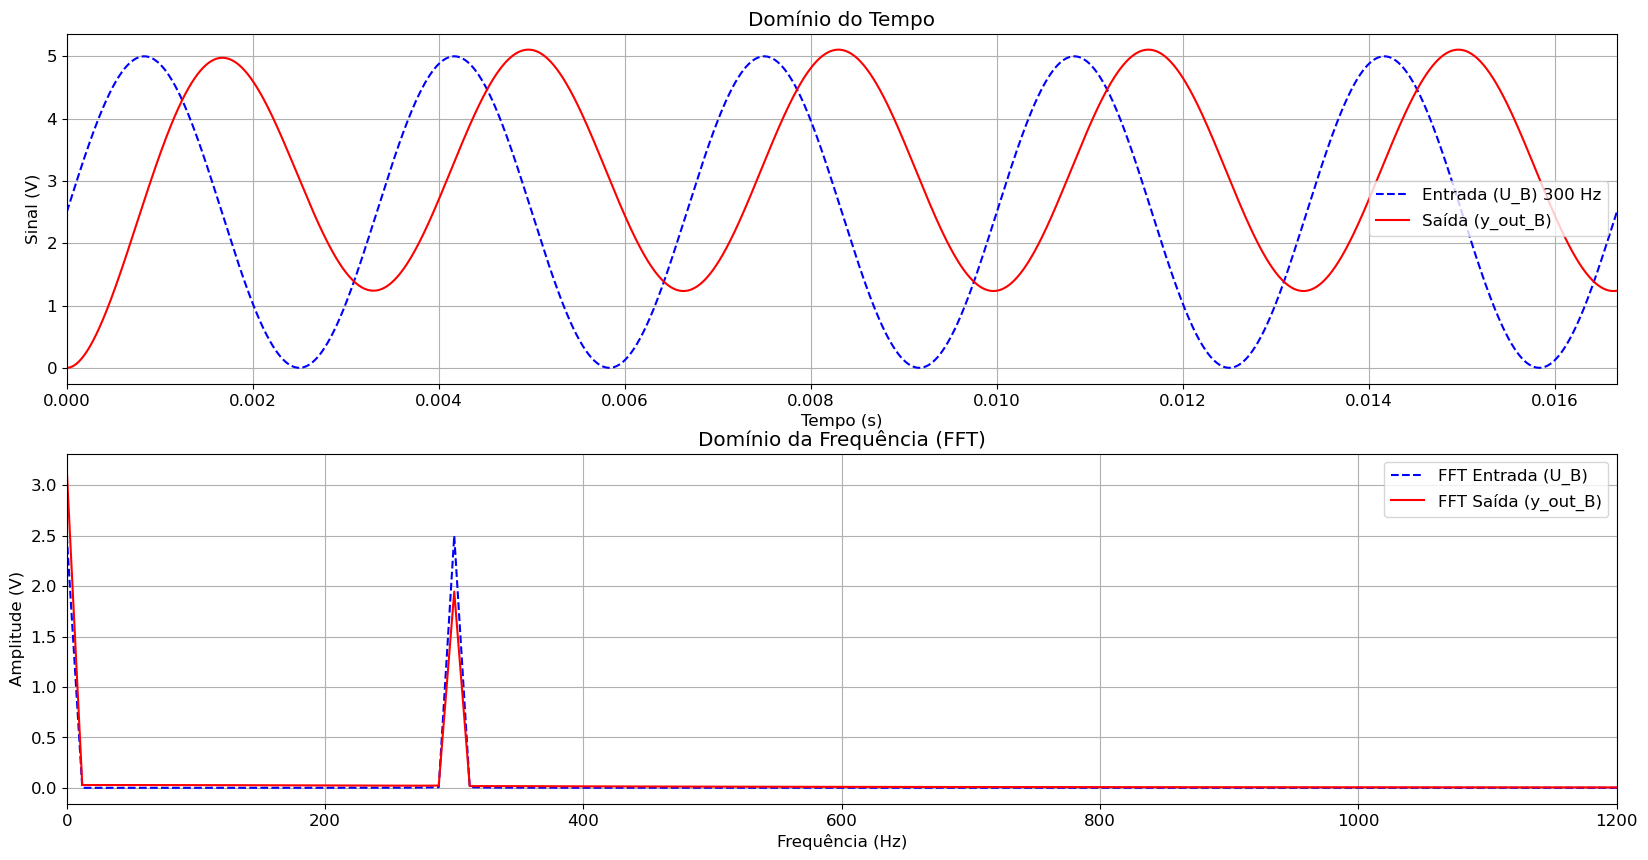

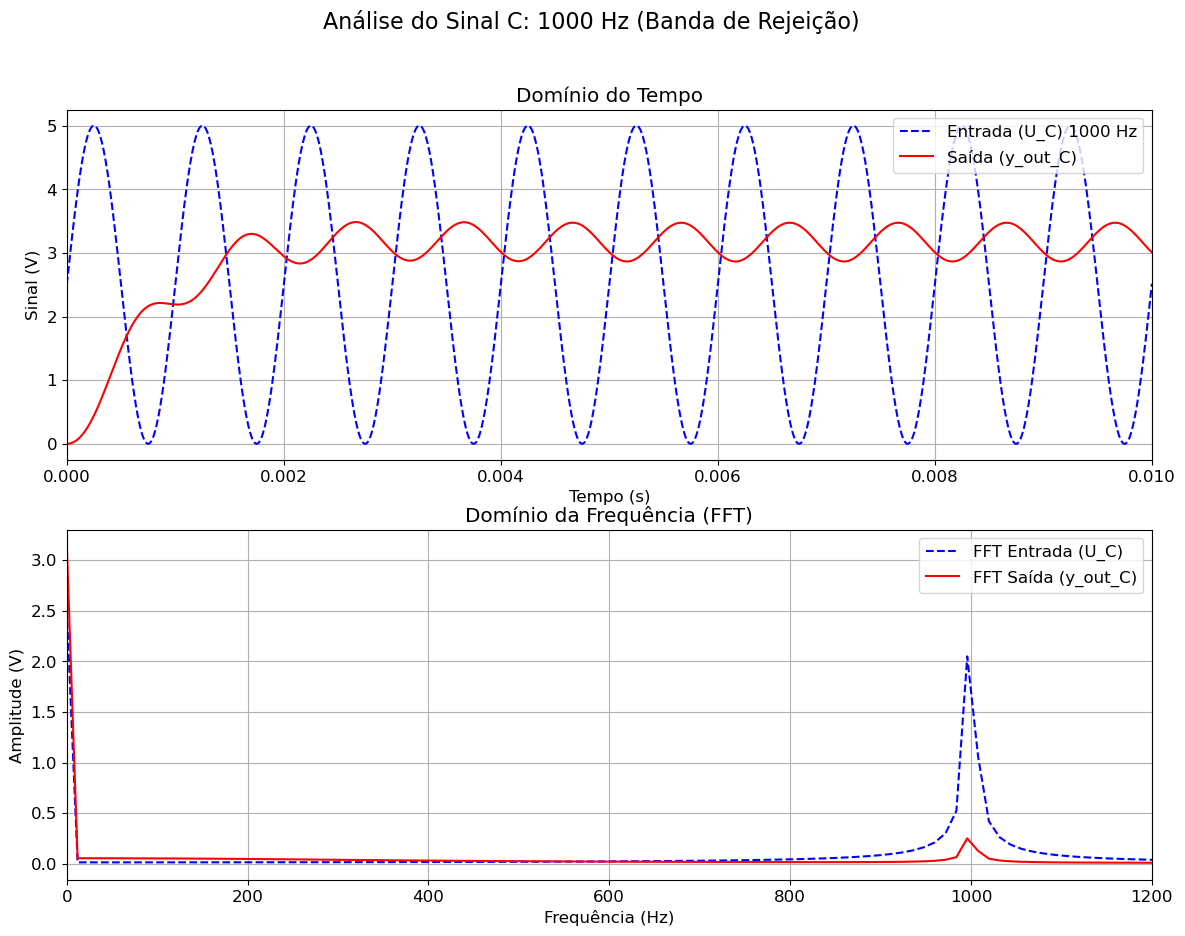

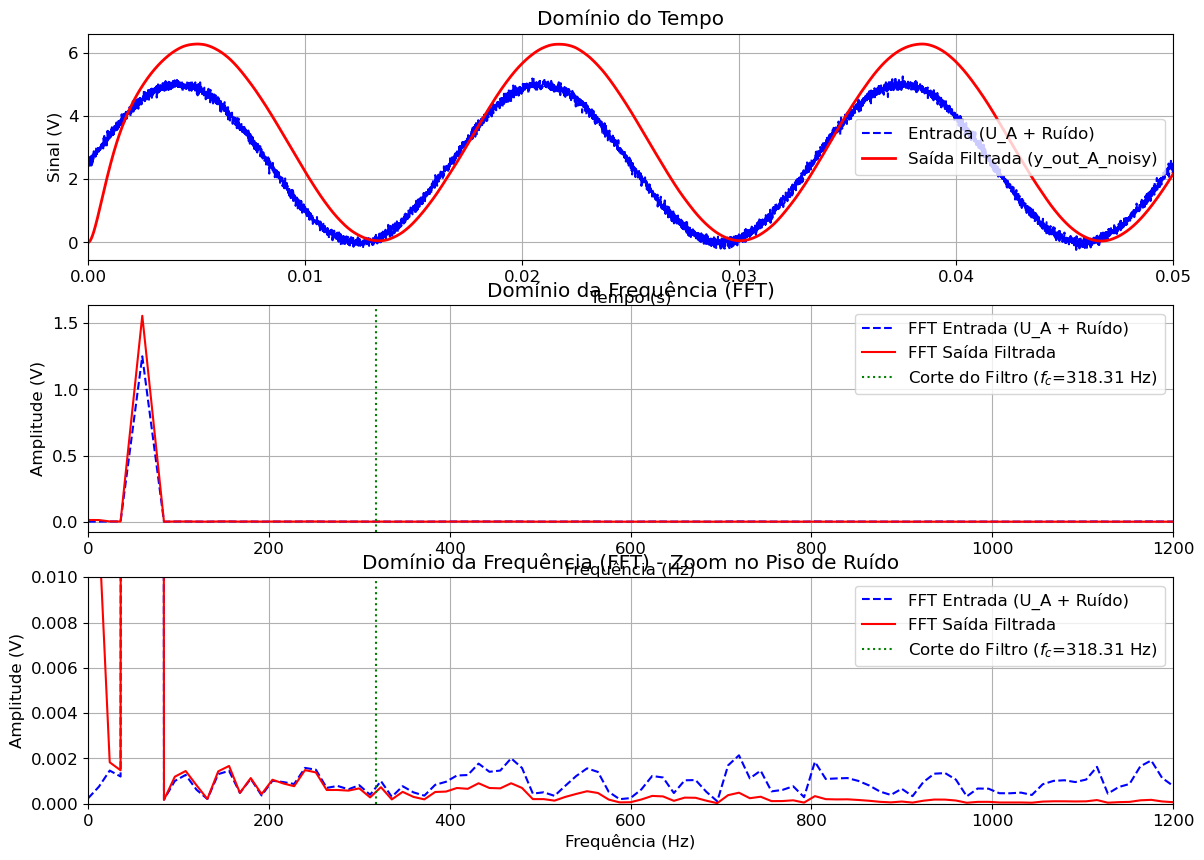


Variáveis do Filtro Bessel capturadas.


In [67]:
print("--- Rodando Bessel_2.py ---")
# O comando %run executa o script. 
# Os gráficos do script aparecerão automaticamente aqui.
%run scripts/Bessel_2.py

# --- Captura de Variáveis ---
# Capturamos as variáveis de resultado em nomes únicos

# (Assumindo que seu script 'Bessel_2.py' define estas variáveis)
w_bessel = w
mag_bessel = mod
fase_bessel = fase
U_A_ruido_bessel = U_A_ruido
y_out_A_ruido_bessel = y_out_A_ruido
t_out_bessel = t_out
fft_U_A_ruido_bessel = fft_U_A_ruido
fft_y_A_ruido_bessel = fft_y_A_ruido
wcF_bessel = wcF
fc_hz_bessel = fc_hz
KF_bessel = KF       # Captura o Ganho K (deve ser ~1.268)
zeta_bessel = zeta   # Captura o Zeta (deve ser ~0.866)

print("\nVariáveis do Filtro Bessel capturadas.")

--- Gerando Gráficos Comparativos Finais ---


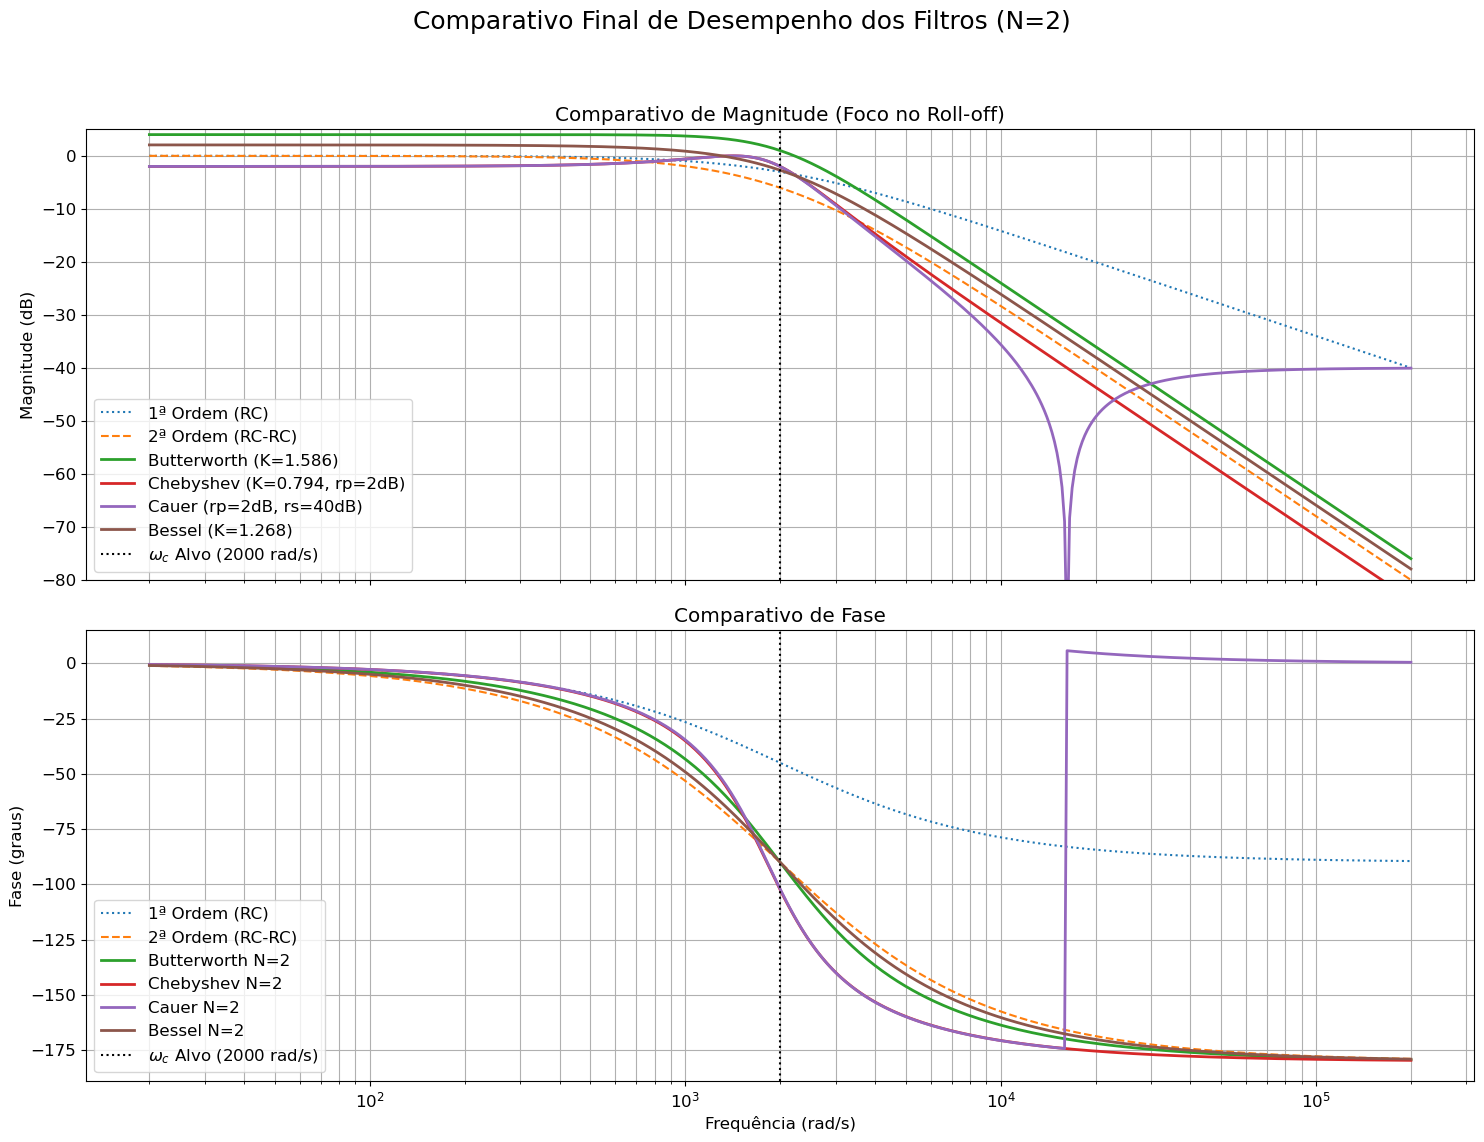

In [69]:
print("--- Gerando Gráficos Comparativos Finais ---")

# Criar uma figura com 2 subplots (um em cima do outro)
# sharex=True "trava" o eixo X (frequência) para ambos os gráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)
fig.suptitle('Comparativo Final de Desempenho dos Filtros (N=2)', fontsize=18)

# --- Subplot 1: Magnitude (O "Roll-off") ---

ax1.set_title('Comparativo de Magnitude (Foco no Roll-off)')
# Usamos as variáveis que capturamos de cada script

# Filtros Passivos (linhas pontilhadas/tracejadas)
ax1.semilogx(w_1a, mag_1a, label='1ª Ordem (RC)', linestyle=':')
ax1.semilogx(w_2a, mag_2a, label='2ª Ordem (RC-RC)', linestyle='--')

# Filtros Ativos (linhas sólidas)
ax1.semilogx(w_butter, mag_butter, label='Butterworth (K=1.586)', linewidth=2)
ax1.semilogx(w_cheby, mag_cheby, label='Chebyshev (K=0.794, rp=2dB)', linewidth=2)
ax1.semilogx(w_cauer, mag_cauer, label='Cauer (rp=2dB, rs=40dB)', linewidth=2)
ax1.semilogx(w_bessel, mag_bessel, label='Bessel (K=1.268)', linewidth=2)

# Linha de corte alvo
ax1.axvline(2000, color='k', linestyle=':', label='$\omega_c$ Alvo (2000 rad/s)')

ax1.set_ylabel('Magnitude (dB)')
ax1.grid(True, which='both')
ax1.legend(loc='lower left')
ax1.set_ylim(-80, 5) # Limita o eixo Y para ver a banda de passagem e a de rejeição


# --- Subplot 2: Fase (O "Atraso") ---

ax2.set_title('Comparativo de Fase')

# Filtros Passivos
ax2.semilogx(w_1a, fase_1a, label='1ª Ordem (RC)', linestyle=':')
ax2.semilogx(w_2a, fase_2a, label='2ª Ordem (RC-RC)', linestyle='--')

# Filtros Ativos
ax2.semilogx(w_butter, fase_butter, label='Butterworth N=2', linewidth=2)
ax2.semilogx(w_cheby, fase_cheby, label='Chebyshev N=2', linewidth=2)
ax2.semilogx(w_cauer, fase_cauer, label='Cauer N=2', linewidth=2)
ax2.semilogx(w_bessel, fase_bessel, label='Bessel N=2', linewidth=2)

ax2.axvline(2000, color='k', linestyle=':', label='$\omega_c$ Alvo (2000 rad/s)')

ax2.set_xlabel('Frequência (rad/s)')
ax2.set_ylabel('Fase (graus)')
ax2.grid(True, which='both')
ax2.legend(loc='lower left')

# Ajusta o layout e exibe o gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

--- Gerando Gráficos Comparativos de Tempo ---


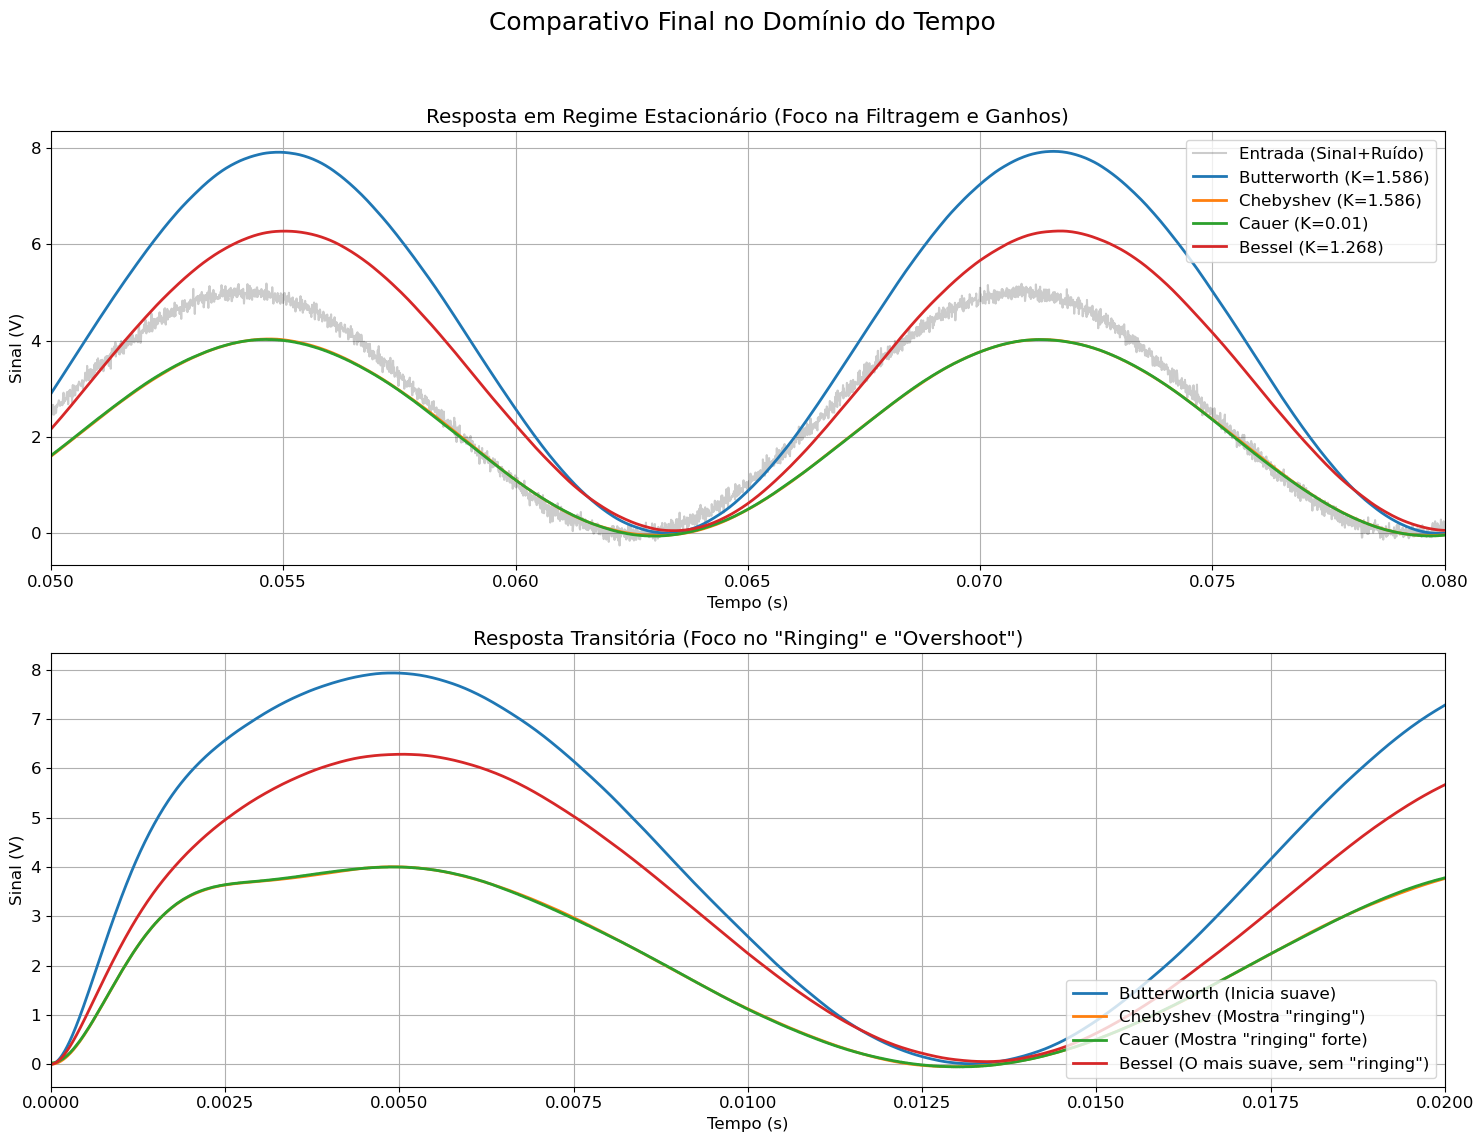

In [73]:
print("--- Gerando Gráficos Comparativos de Tempo ---")

# Criar uma figura com 2 subplots (um em cima do outro)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('Comparativo Final no Domínio do Tempo', fontsize=18)

# --- Subplot 1: Regime Estacionário (Zoom em alguns ciclos) ---
# Aqui vemos a remoção do ruído e os diferentes ganhos (K)

ax1.set_title('Resposta em Regime Estacionário (Foco na Filtragem e Ganhos)')

# Plotar a entrada (U_A_ruido) UMA VEZ (usando a primeira capturada)
ax1.plot(t_out_1a, U_A_ruido_1a, 'k-', label='Entrada (Sinal+Ruído)', alpha=0.2)

# Plotar as saídas dos filtros ativos de 2ª Ordem
ax1.plot(t_out_butter, y_out_A_ruido_butter, label=f'Butterworth (K={KF_butter:.3f})', linewidth=2)
ax1.plot(t_out_cheby, y_out_A_ruido_cheby, label=f'Chebyshev (K={KF_cheby:.3f})', linewidth=2)
ax1.plot(t_out_cauer, y_out_A_ruido_cauer, label='Cauer (K=0.01)', linewidth=2) # K do Cauer era 0.01
ax1.plot(t_out_bessel, y_out_A_ruido_bessel, label=f'Bessel (K={KF_bessel:.3f})', linewidth=2)

# (Opcional: Adicionar os filtros RC se desejar)
# ax1.plot(t_out_1a, y_out_A_ruido_1a, label='1ª Ordem (RC)', linestyle=':')
# ax1.plot(t_out_2a, y_out_A_ruido_2a, label='2ª Ordem (RC-RC)', linestyle='--')

ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Sinal (V)')
ax1.grid(True)
ax1.legend(loc='upper right')
# Zoom em alguns ciclos no "meio" da simulação
ax1.set_xlim(0.05, 0.08) 


# --- Subplot 2: Resposta Transitória (Zoom no início) ---
# Este é o gráfico mais importante para ver "ringing" vs. "suavidade"

ax2.set_title('Resposta Transitória (Foco no "Ringing" e "Overshoot")')

# (Não plotamos a entrada ruidosa aqui, ela poluiria o gráfico)

# Plotar as saídas dos filtros ativos
ax2.plot(t_out_butter, y_out_A_ruido_butter, label='Butterworth (Inicia suave)', linewidth=2)
ax2.plot(t_out_cheby, y_out_A_ruido_cheby, label='Chebyshev (Mostra "ringing")', linewidth=2)
ax2.plot(t_out_cauer, y_out_A_ruido_cauer, label='Cauer (Mostra "ringing" forte)', linewidth=2)
ax2.plot(t_out_bessel, y_out_A_ruido_bessel, label='Bessel (O mais suave, sem "ringing")', linewidth=2)

ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Sinal (V)')
ax2.grid(True)
ax2.legend(loc='lower right')
# Zoom crucial nos primeiros 20ms (aprox 1.2 ciclos do sinal de 60Hz)
ax2.set_xlim(0, 0.02)
# (Opcional: Ajuste o Y-lim para focar na oscilação)
# ax2.set_ylim(0, 5) 

# Ajusta o layout e exibe o gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()